### Characteristics:
1. Balanced
2. RegAndDropout
3. EmbeddingsUsingWord2VecMechanism-FromScratch (Not pretrained)
4. AllDatasetsEN
5. Analysis done on Neuroticism trait

### Wordings
1. modelx_drop_lx ... --> Means we have a dropout layer added
2. modelx_drop_recdrop_lx --> Means within an existing GRU/LSTM layer, dropout is added
3. modelx_drop_recdrop_drop_lx --> Means we have a dropout layer added AND an exisiting GRU/LSTM layer has dropout

# Part 1: Conversion to Binary Classes

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Import our dataset
# MyDataset aggregated to 150 users
df = pd.DataFrame()
df = pd.read_csv('C:/Users/Stephany/Documents/Jupyter/Classification/datasets/MyDataset150_EN.csv', encoding='utf-8')
df = df[['#AUTHID','STATUS_TRANSLATED','sOPN','sCON','sEXT','sAGR','sNEU']]
# Rename col
df.rename(columns={'STATUS_TRANSLATED':'STATUS'}, inplace=True)
df.tail()

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU
6420,150,#summer #fun #dany's dinner #friends #night #b...,3.3,4.1,2.7,4.4,3.0
6421,150,Snow,3.3,4.1,2.7,4.4,3.0
6422,150,Searching for you Jesus,3.3,4.1,2.7,4.4,3.0
6423,150,Love #cousins #wedding #beautiful night <4,3.3,4.1,2.7,4.4,3.0
6424,150,Fun #sun #enjoy #beautiful #day 😍,3.3,4.1,2.7,4.4,3.0


In [3]:
a = df.groupby(['#AUTHID'])['STATUS'].apply(lambda x: ' --- '.join((x))).reset_index()
a.tail(10)

,#AUTHID,STATUS
140,141,What's on the outside doesn't matter its all a...
141,142,"If I ask you about the people of Yemen, tell ..."
142,143,In Fatima.. Hezbollah --- Habibi 😍 ♥ ️✨ --- Al...
143,144,We all piss the same blood #Say No To Racism -...
144,145,Studies at Lebanese University - Faculty of Sc...
145,146,Participants must be Lebanese with a diagnosis...
146,147,Computer scientist to be --- Thank God --- Dea...
147,148,Management Information System 🖥️ --- Teacher 👩...
148,149,The Keyword To Our” “RELATI0NSHIPS :” “TR [ U ...
149,150,Happy Labor Day 🏗✊👷‍♂️🔩 🏡 --- Have A Blessed H...


In [4]:
#Import Facebook mypersonality dataset
df_new = pd.DataFrame()
df_new = pd.read_csv('C:/Users/Stephany/Documents/Jupyter/Classification/datasets/mypersonality_final.csv', encoding = "latin_1")
df_new = df_new[['#AUTHID','STATUS','sOPN','sCON','sEXT','sAGR','sNEU']]
df_new.tail()

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU
9912,deb899e426c1a5c66c24eeb0d7df6257,little things give you away.,4.60,2.90,2.15,4.10,2.15
9913,ea28a927cb6663480ea33ca917c3c8ba,is wishing it was Saturday.,4.50,3.95,4.05,3.80,3.35
9914,ea28a927cb6663480ea33ca917c3c8ba,is studying hard for the G.R.E.,4.50,3.95,4.05,3.80,3.35
9915,5532642937eb3497a43e15dbb23a9d2d,snipers get more head,3.95,3.40,1.40,3.30,4.05
9916,a286b7286b1247d4a7851709e9f31e1e,Last night was amazing! Not only did I see *PR...,4.00,3.50,4.25,3.25,3.00


In [5]:
b = df_new.groupby(['#AUTHID'])['STATUS'].apply(lambda x: ' --- '.join(x)).reset_index()
b.tail(10)

,#AUTHID,STATUS
240,f6cb2eff458f065858363e86515beaab,"is in Kuwait, soon to be at FOB Warhorse Iraq"
241,f6e7722b811d00a7a40de2ecfab636e6,"Up to 249 friends already, nearly to 250! --- ..."
242,f725d0ec71a511886168c30cef6468d9,biting heads off of Barbie dolls. Stress sucks...
243,f7456ac4e6b20911c40fdad18908a8d2,is resting her voice...stupid laryngitis --- t...
244,f80644859abfbc92e9a92072c2dc50fa,is baking a cherry pie from scratch :-) --- fo...
245,f83aa7290cf3ae8ed75d6aee5ebbb559,Jäg äslkar sverige! D-4 --- sweden! D-1 --- D ...
246,fbe5aa478508d1dc931427ade5d9e1b4,Totalled my car last night. Luckilly no one wa...
247,fc1c9fb6c64740edcbbf8cfe9dde8b02,youtube rules. it honestly does --- green day ...
248,fe22087986fdcc65939c793fe0ec90a9,got up early today for a trip to Hamburg .. oh...
249,fffafe151f07a30a0ede2038a897b680,Is flying back friday night in time to move th...


In [6]:
#Import YouTube vlog dataset
df_new_new = pd.read_csv("C:/Users/Stephany/Documents/Jupyter/Classification/datasets/YoutubeDatasetDifferentScalesWithTranscript.csv", encoding="ISO-8859-1")
df_new_new = df_new_new[['#AUTHID','STATUS','sOPN','sCON','sEXT','sAGR','sNEU']]
df_new_new.tail()

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU
399,a438,Hi I'm doing this for lakes for weather tonigh...,2.73,2.67,2.07,3.80,1.53
400,a439,Hi guys. You know that feeling when you kind o...,4.13,3.67,4.07,4.27,0.73
401,a440,"New challenge. Okay, so week nine's challenge ...",3.47,3.13,3.40,3.60,1.47
402,a441,That is a subtle thing. Let me do it somewhere...,3.07,3.73,3.53,4.20,0.73
403,a442,"Merry Christmas. Oh, my God. Yeah, it's finall...",3.80,3.07,4.00,3.60,1.33


In [7]:
c = df_new_new.groupby(['#AUTHID'])['STATUS'].apply(lambda x: ' --- '.join(x)).reset_index()
c.tail(10)

,#AUTHID,STATUS
394,a9,"Hey guys, it's Monday. Have you ever recorded ..."
395,a90,"Ladies and gentleman, robots. This blog is las..."
396,a91,"Hey guys, this is XXXX, coming to you from the..."
397,a92,"Hey, everybody. So before you immediately deci..."
398,a93,"Hello. Um, I'm learning guitar, and this is a ..."
399,a94,"This is a response to XXXX. Um, okay, so the f..."
400,a96,"Hello, it's, um, XXXX, and it's four twenty a...."
401,a97,It's really difficult doing this particular pa...
402,a98,"Hi, everybody. I don't have my glasses on. Um,..."
403,a99,Guess who's procrastinating? I am. There's a r...


In [8]:
# Merge then aggregate to have 150+250+404 users 

In [9]:
a_b = a.append(b, ignore_index = True) # for appending df2 at the end of df1 
len(a_b)

400

In [10]:
a_b_c = a_b.append(c, ignore_index = True) # for appending df2 at the end of df1 
len(a_b_c)

804

In [11]:
a_b_c.tail(10)

,#AUTHID,STATUS
794,a9,"Hey guys, it's Monday. Have you ever recorded ..."
795,a90,"Ladies and gentleman, robots. This blog is las..."
796,a91,"Hey guys, this is XXXX, coming to you from the..."
797,a92,"Hey, everybody. So before you immediately deci..."
798,a93,"Hello. Um, I'm learning guitar, and this is a ..."
799,a94,"This is a response to XXXX. Um, okay, so the f..."
800,a96,"Hello, it's, um, XXXX, and it's four twenty a...."
801,a97,It's really difficult doing this particular pa...
802,a98,"Hi, everybody. I don't have my glasses on. Um,..."
803,a99,Guess who's procrastinating? I am. There's a r...


In [12]:
a_b_c.head(10)

,#AUTHID,STATUS
0,1,Have you ever ended a friendship and not miss ...
1,2,#My Star 🌟❤️ --- ❤️⭐️❤️ --- Started New Job at...
2,3,A must watch video! --- May you reach 100 year...
3,4,Saint Chayia --- Paradise for those who have d...
4,5,🖤 --- 🍂 --- 😇 --- 💸🌍 --- I am all that I inten...
5,6,Something new. --- District Toastmasters Annua...
6,7,You are the eyes of your aunt! 😍😍😍 Congratulat...
7,8,Princess of all stars 💙❄️ --- #BMW all the lov...
8,9,"And if you get tired, there is someone who is ..."
9,10,You suddenly discover that you do not want to ...


In [13]:
df_mypersonality_mydataset = df_new.append(df, ignore_index = True) # for appending df2 at the end of df1 
len(df_mypersonality_mydataset)


16342

In [14]:
df_final = df_new_new.append(df_mypersonality_mydataset, ignore_index = True) # for appending df2 at the end of df1 
len(df_final)

16746

In [15]:
usergroup = pd.merge(a_b_c, df_final[['#AUTHID','sOPN','sCON','sEXT','sAGR','sNEU']].drop_duplicates(), on='#AUTHID', how='left')
usergroup

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU
0,1,Have you ever ended a friendship and not miss ...,4.60,3.30,4.30,4.20,1.90
1,2,#My Star 🌟❤️ --- ❤️⭐️❤️ --- Started New Job at...,4.00,3.90,2.70,3.20,3.60
2,3,A must watch video! --- May you reach 100 year...,4.30,2.90,4.30,4.30,4.20
3,4,Saint Chayia --- Paradise for those who have d...,4.50,3.90,2.10,3.80,2.80
4,5,🖤 --- 🍂 --- 😇 --- 💸🌍 --- I am all that I inten...,2.90,3.00,3.40,2.60,2.50
5,6,Something new. --- District Toastmasters Annua...,3.60,4.10,3.00,3.60,1.80
6,7,You are the eyes of your aunt! 😍😍😍 Congratulat...,4.20,2.40,3.20,4.10,4.30
7,8,Princess of all stars 💙❄️ --- #BMW all the lov...,3.20,3.10,2.90,3.30,3.00
8,9,"And if you get tired, there is someone who is ...",3.80,4.00,3.00,3.50,3.30
9,10,You suddenly discover that you do not want to ...,4.60,3.50,3.40,4.50,4.50


# Thresholding at 2.5 where our scale's minimum is 0.0 and  maximum is 5.0

In [16]:
def label_sOPN (row):
    if row['sOPN'] >= 2.5:
        return 1
    if row['sOPN'] < 2.5:
        return 0

In [17]:
def label_sCON (row):
    if row['sCON'] >= 2.5:
        return 1
    if row['sCON'] < 2.5:
        return 0

In [18]:
def label_sEXT (row):
    if row['sEXT'] >= 2.5:
        return 1
    if row['sEXT'] < 2.5:
        return 0

In [19]:
def label_sAGR (row):
    if row['sAGR'] >= 2.5:
        return 1
    if row['sAGR'] < 2.5:
        return 0

In [20]:
def label_sNEU (row):
    if row['sNEU'] >= 2.5:
        return 1
    if row['sNEU'] < 2.5:
        return 0

In [21]:
usergroup['cOPN'] = usergroup.apply (lambda row: label_sOPN(row), axis=1)
usergroup['cCON'] = usergroup.apply (lambda row: label_sCON(row), axis=1)
usergroup['cEXT'] = usergroup.apply (lambda row: label_sEXT(row), axis=1)
usergroup['cAGR'] = usergroup.apply (lambda row: label_sAGR(row), axis=1)
usergroup['cNEU'] = usergroup.apply (lambda row: label_sNEU(row), axis=1)

In [22]:
usergroup

,#AUTHID,STATUS,sOPN,sCON,sEXT,sAGR,sNEU,cOPN,cCON,cEXT,cAGR,cNEU
0,1,Have you ever ended a friendship and not miss ...,4.60,3.30,4.30,4.20,1.90,1,1,1,1,0
1,2,#My Star 🌟❤️ --- ❤️⭐️❤️ --- Started New Job at...,4.00,3.90,2.70,3.20,3.60,1,1,1,1,1
2,3,A must watch video! --- May you reach 100 year...,4.30,2.90,4.30,4.30,4.20,1,1,1,1,1
3,4,Saint Chayia --- Paradise for those who have d...,4.50,3.90,2.10,3.80,2.80,1,1,0,1,1
4,5,🖤 --- 🍂 --- 😇 --- 💸🌍 --- I am all that I inten...,2.90,3.00,3.40,2.60,2.50,1,1,1,1,1
5,6,Something new. --- District Toastmasters Annua...,3.60,4.10,3.00,3.60,1.80,1,1,1,1,0
6,7,You are the eyes of your aunt! 😍😍😍 Congratulat...,4.20,2.40,3.20,4.10,4.30,1,0,1,1,1
7,8,Princess of all stars 💙❄️ --- #BMW all the lov...,3.20,3.10,2.90,3.30,3.00,1,1,1,1,1
8,9,"And if you get tired, there is someone who is ...",3.80,4.00,3.00,3.50,3.30,1,1,1,1,1
9,10,You suddenly discover that you do not want to ...,4.60,3.50,3.40,4.50,4.50,1,1,1,1,1


In [23]:
df_classification_cNEU = usergroup[['STATUS','cNEU']]
df_classification_cNEU

,STATUS,cNEU
0,Have you ever ended a friendship and not miss ...,0
1,#My Star 🌟❤️ --- ❤️⭐️❤️ --- Started New Job at...,1
2,A must watch video! --- May you reach 100 year...,1
3,Saint Chayia --- Paradise for those who have d...,1
4,🖤 --- 🍂 --- 😇 --- 💸🌍 --- I am all that I inten...,1
5,Something new. --- District Toastmasters Annua...,0
6,You are the eyes of your aunt! 😍😍😍 Congratulat...,1
7,Princess of all stars 💙❄️ --- #BMW all the lov...,1
8,"And if you get tired, there is someone who is ...",1
9,You suddenly discover that you do not want to ...,1


# ------------------------------------------------------------------------------------------------------------
# Part 2: Class Imbalacement Treatment
### Solution #1: Up-sample Minority Class

In [24]:
df_classification_cNEU['cNEU'].value_counts()

0    523
1    282
Name: cNEU, dtype: int64

In [25]:
from sklearn.utils import resample

In [26]:
# Separate majority and minority classes
# In our case, the majority in the NEUROTICISM trait is 0 --> 523 and 1 --> 282 
df_majority = df_classification_cNEU[df_classification_cNEU.cNEU==0]
df_minority = df_classification_cNEU[df_classification_cNEU.cNEU==1]

In [27]:
df_majority.head()

,STATUS,cNEU
0,Have you ever ended a friendship and not miss ...,0
5,Something new. --- District Toastmasters Annua...,0
19,"Success, the best revenge. 💰 💰 --- happy birth...",0
24,May God increase people like you #you ate my c...,0
30,Money heist 💰 --- #With bro --- #The squad #Su...,0


In [28]:
df_minority.head()

,STATUS,cNEU
1,#My Star 🌟❤️ --- ❤️⭐️❤️ --- Started New Job at...,1
2,A must watch video! --- May you reach 100 year...,1
3,Saint Chayia --- Paradise for those who have d...,1
4,🖤 --- 🍂 --- 😇 --- 💸🌍 --- I am all that I inten...,1
6,You are the eyes of your aunt! 😍😍😍 Congratulat...,1


In [29]:
len(df_majority)

523

In [30]:
len(df_minority)

282

In [31]:
 # Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=523,    # to match majority class
                                 random_state=123) # reproducible results

In [32]:
len(df_minority_upsampled)

523

In [33]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [34]:
 # Display new class counts
df_upsampled.cNEU.value_counts()

1    523
0    523
Name: cNEU, dtype: int64

In [35]:
df_upsampled

,STATUS,cNEU
0,Have you ever ended a friendship and not miss ...,0
5,Something new. --- District Toastmasters Annua...,0
19,"Success, the best revenge. 💰 💰 --- happy birth...",0
24,May God increase people like you #you ate my c...,0
30,Money heist 💰 --- #With bro --- #The squad #Su...,0
31,"If you experience fear, you’re shit in luck. -...",0
32,Homemade sushi rolls 😍😍 --- 😍😍 on the way to C...,0
34,Always Be selective in your battles for someti...,0
37,"The most important is, to keep the most import...",0
41,"Don't Study me, you won't graduate... I'm 50% ...",0



# --------------------------------------------------------------------
SOURCE: https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456
# Part 3: Classification of cNEU


# 1. The first step is to prepare the text corpus for learning the embedding by creating: (1) word tokens, (2) removing punctuation, (3) removing stop words etc. 

## NB: The word2vec algorithm processes documents sentence by sentence.

## New: Stop words list is now in english and arabic

In [36]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = list()
lines = df_upsampled['STATUS'].values.tolist()

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
    stop_eng = stopwords.words('english')
    words = [w for w in words if not w in stop_eng]
    review_lines.append(words)

In [37]:
len(review_lines)

1046

In [38]:
review_lines[1]

['something',
 'new',
 'district',
 'toastmasters',
 'annual',
 'conference',
 'dubai',
 'high',
 'halls',
 'kings',
 'gone',
 'jenny',
 'would',
 'dance',
 'ghosts',
 'ones',
 'lost',
 'ones',
 'found',
 'ones',
 'loved',
 'lebanese',
 'cross',
 'country',
 'championship',
 'horsh',
 'beirut',
 'season',
 'opener',
 'alarzclub',
 'show',
 'must',
 'go',
 'one',
 'us',
 'winter',
 'hear',
 'lions',
 'stags',
 'grazing',
 'roses',
 'growing',
 'snakes',
 'krakens',
 'freeze',
 'flayed',
 'men',
 'rot',
 'trouts',
 'swimming',
 'river',
 'falcons',
 'flying',
 'even',
 'dragon',
 'breath',
 'warm',
 'halls',
 'shall',
 'hear',
 'wolves',
 'know',
 'winter',
 'come',
 'graduated',
 'lebanese',
 'university',
 'civil',
 'engineering',
 'legendary',
 'phenomenal',
 'kathia',
 'civil',
 'engineering',
 'diplôme',
 'get',
 'innnnnn',
 'iconic',
 'winning',
 'place',
 'prouder',
 'youssef',
 'wehbi',
 'finally',
 'lebanese',
 'university',
 'cross',
 'race',
 'guys',
 'participating',
 'redbul

In [39]:
len(review_lines[1])

201

In [40]:
review_lines[2]

['success',
 'best',
 'revenge',
 'happy',
 'birthday',
 'dad',
 'cant',
 'thank',
 'enough',
 'done',
 'da',
 'best',
 'love',
 'dont',
 'party',
 'much',
 'got',
 'work',
 'tomorrow',
 'morning',
 'time',
 'celebrate',
 'speechless',
 'saint',
 'charbel',
 'taking',
 'boss',
 'dad',
 'holiday',
 'little',
 'throwback',
 'left',
 'speechless',
 'last',
 'night',
 'receiving',
 'new',
 'car',
 'christmas',
 'dreams',
 'come',
 'true',
 'years',
 'make',
 'big',
 'difference',
 'baby',
 'big',
 'boss',
 'dad',
 'happy',
 'fathers',
 'day',
 'dad',
 'best',
 'friend',
 'mentor',
 'love',
 'mate',
 'australia',
 'needs',
 'grow',
 'ridiculous',
 'year',
 'ridiculous',
 'sister',
 'taking',
 'photo',
 'pretending',
 'nt',
 'know',
 'beautiful',
 'cousin',
 'already',
 'year',
 'since',
 'sister',
 'got',
 'married',
 'lol',
 'would',
 'anything',
 'right',
 'great',
 'grandpa',
 'years',
 'old',
 'love',
 'make',
 'sure',
 'go',
 'check',
 'use',
 'name',
 'door',
 'absolutely',
 'discount

In [41]:
len(review_lines[2])

279

#### SO, It is essential to have equal input tensors for the neural network

# 2. Train word2vec model: Gensim’s Word2Vec API requires some parameters for initialization
1. __sentences__ – List of sentences; here we pass the list of review sentences.

2. __size__ – The number of dimensions in which we wish to represent our word. This is the size of the word vector.

3. __min_count__ – Word with frequency greater than min_count only are going to be included into the model. Usually, the bigger and more extensive your text, the higher this number can be.

4. __window__ – Only terms that occur within a window-neighborhood of a term, in a sentence, are associated with it during training. The usual value is 4 or 5.

5. __workers__– Number of threads used in training parallelization, to speed up training

In [42]:
import gensim 

EMBEDDING_DIM = 300

# train word2vec model
model = gensim.models.Word2Vec(sentences=review_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)

In [43]:
# vocab size
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 23210


In [44]:
# save model in ASCII (word2vec) format
filename = 'Neu1.txt'
model.wv.save_word2vec_format(filename, binary=False)

# 3. Test Word2Vec Model
After we train the model on our dataset, it builds a vocabulary size = 37754 . Let us try some word embeddings the model learnt from the  dataset.

The most similar words for word 'horrible' are:

In [45]:
# let us try some utility functions of gensim word2vec more details here 
# If word is not in vocabulary, there will be an error
model.wv.most_similar('king')#, topn =1)

[('compared', 0.9997623562812805),
 ('became', 0.9997413754463196),
 ('modern', 0.9997193217277527),
 ('horizon', 0.9997179508209229),
 ('principle', 0.999717652797699),
 ('delivered', 0.9997050762176514),
 ('glorious', 0.9997012615203857),
 ('reflection', 0.9996973276138306),
 ('shepherd', 0.9996953010559082),
 ('boss', 0.9996860027313232)]

In [46]:
#Let’s see the result of semantically reasonable word vectors (king - man + woman)
model.wv.most_similar_cosmul(positive=['good', 'beautiful'], negative=['bad'])

[('immortality', 1.0265897512435913),
 ('luckiest', 1.0264708995819092),
 ('flattered', 1.0249485969543457),
 ('mother', 1.0243340730667114),
 ('forgiving', 1.0240815877914429),
 ('thank', 1.0232754945755005),
 ('nopardon', 1.0227465629577637),
 ('toothbrush', 1.0222960710525513),
 ('demonstrators', 1.0220417976379395),
 ('prosperous', 1.0220345258712769)]

In [47]:
model.wv.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('evening', 1.0069060325622559),
 ('lovely', 1.0068588256835938),
 ('yesterday', 1.0067815780639648),
 ('throwback', 1.0067226886749268),
 ('fabulous', 1.0066639184951782),
 ('started', 1.006653070449829),
 ('single', 1.006638526916504),
 ('quality', 1.0066262483596802),
 ('practically', 1.0066121816635132),
 ('upcoming', 1.0066030025482178)]

In [48]:
print(model.wv.doesnt_match("woman king queen movie".split()))

movie


This is very interesting to see the word embeddings learned by our word2vec model form the text corpus. __The next step is to use the word embeddings directly in the embedding layer in our regression analysis model__. we can save the model to be used later.

# 4. Use our pretrained embedding
1. Since we have already trained word2vec model with __OUR__ dataset, we have the word embeddings ready to use. 
(Steph: you can add our dataset to an existing word embedding (to be downloaded) or update it with the other MyPersonality dataset)

2. __The next step is to load the word embedding as a directory of words to vectors__. --> Steph: for each embedding index (key = word), we did an embedding 2D vector mapping all the word embeddings to be able to use them in our NeuralNet

3. The word embedding was saved in file ClassificationOfText-1.txt. Let us extract the word embeddings from the stored file.

In [49]:
# Extracting word embeddings from the stored file
import os

embeddings_index = {}
f = open(os.path.join('', 'Neu1.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [50]:
embeddings_index['hi']

array(['0.13607942', '-0.21254472', '0.30463094', '0.1302785',
       '0.38071775', '-0.43943384', '-0.06357266', '0.14301342',
       '0.238818', '-0.39913997', '0.19144279', '-0.2710517',
       '0.11234182', '0.2506823', '0.24080382', '0.18205695',
       '-0.37815964', '-0.045275558', '-0.60146016', '-0.285181',
       '0.58353794', '0.04401646', '-0.34886837', '-0.15624358',
       '0.37104386', '0.15407653', '0.10120258', '-0.013261913',
       '0.13038324', '-0.16538703', '-0.10893444', '0.3249294',
       '0.008075743', '-0.27109033', '0.016958958', '-0.11941958',
       '-0.27502933', '-0.18968783', '-0.3038062', '0.08142971',
       '-0.045549367', '0.39776734', '0.2102973', '-0.3671237',
       '-0.1434766', '0.21705006', '-0.22178511', '-0.13408944',
       '-0.6916128', '-0.06199223', '0.029201545', '0.06839463',
       '-0.032126307', '0.047766667', '0.04893759', '0.46161783',
       '-0.054617237', '-0.021545658', '-0.045229737', '0.14621882',
       '-0.19584791', '-0.1

In [51]:
from sklearn.model_selection import train_test_split
df_x = df_upsampled['STATUS'].values
df_y = df_upsampled['cNEU'].values
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.5, random_state = 99)

In [52]:
y_train

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

In [53]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [54]:
len(df_upsampled)

1046

In [55]:
len(x_train)

523

In [56]:
len(x_test)

523

In [57]:
# Maximum number of words in a status = 6002
# We will pad all the words in a status on the maximum words # in a status with 0s, since we have to enter the same vector length
# Then this vector will be mapped to a word embedding of 10
total_reviews = x_train + x_test
max_length = max([len(s.split()) for s in total_reviews]) # Look at the max function --> It will get the max status length
max_length

6404

### Steph: Not all statuses map to all embeddings, each status has specific words hence specific embeddings

In [58]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.2

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen=max_length)
sentiment =  df_upsampled['cNEU'].values
print('Shape of status tensor:', review_pad.shape) # 12223 rows, 360 cols as max length, not all filled with numbers other than 0s of course.
print('Shape of class tensor:', sentiment.shape) # 12223 rows, and 1 and only 1 default column containing sOPN value

num_words = len(word_index) + 1

# split the data into a training set and a validation set
indices = np.arange(review_pad.shape[0]) #take number of rows=12223 and shuffle them
indices[:10]


C:\Users\Stephany\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Found 23210 unique tokens.
Shape of review tensor: (1046, 6404)
Shape of sentiment tensor: (1046,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
np.random.shuffle(indices)
indices[:10]

array([873, 845, 915, 810, 559, 865, 805, 181, 144, 765])

In [60]:
review_pad = review_pad[indices]
review_pad[1]

array([   0,    0,    0, ..., 6467,  619, 2423])

In [61]:
# X independent variable
#N3AMALON PAD --> EQUAL SIZES for all review_pad[1]=review_pad[2]=review_pad[3]...=5905
len(review_pad[1])

6404

In [62]:
len(review_pad[2])

6404

In [63]:
# Y Target variable
sentiment = sentiment[indices]
sentiment[1]

1

In [64]:
review_pad.shape[0] #upsampled, it should've been 404 + 250 users.

1046

In [65]:
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0]) # 0.2 x 805 users
num_validation_samples

209

In [66]:
X_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [67]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (837, 6404)
Shape of y_train tensor: (837,)
Shape of X_test_pad tensor: (209, 6404)
Shape of y_test tensor: (209,)


# WE ARE USING THIS SPLIT: Training-Validation-Testing Data

In [68]:
from sklearn.model_selection import train_test_split
df_x = df_upsampled['STATUS'].values
df_y = df_upsampled['cNEU'].values
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(review_pad, sentiment, test_size=0.3, random_state = 42)


In [69]:
print('Shape of X_train_pad tensor:', x_train.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', x_val_and_test.shape)
print('Shape of y_test tensor:', y_val_and_test.shape)

Shape of X_train_pad tensor: (732, 6404)
Shape of y_train tensor: (732,)
Shape of X_test_pad tensor: (314, 6404)
Shape of y_test tensor: (314,)


source: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
## Splitting our data into 3: Training, Validation, and Testing

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

from sklearn.model_selection import train_test_split
Then, split your dataset like this:

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
This tells scikit-learn that your val_and_test size will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.

### Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

#### X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
The code above will split the val_and_test size equally to the validation set and the test set.

In summary, we now have a total of six variables for our datasets we will use:

1. X_train (10 input features, 80% of full dataset)
2. X_val (10 input features, 10% of full dataset)
3. X_test (10 input features, 10% of full dataset)
4. Y_train (1 label, 80% of full dataset)
5. Y_val (1 label, 10% of full dataset)
6. Y_test (1 label, 10% of full dataset)
7. If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

### Once you’re happy with your final model, we can evaluate it on the test set. To find the accuracy on our test set, we run this code snippet:

- model.evaluate(X_test, Y_test)[1]

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

### Due to the randomness in how we have split the dataset as well as the initialization of the weights, the numbers and graph will differ slightly each time we run our notebook. Nevertheless, you should get a test accuracy anywhere between 80% to 95% if you’ve followed the architecture I specified above!

In [70]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [71]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(732, 6404) (157, 6404) (157, 6404) (732,) (157,) (157,)


# Strategies to reduce Overfitting
## Solution 1: Add weight regularization
l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time. <br>
__ two stars mean to the power of__

## Usage of regularizers
#### source: https://keras.io/regularizers/
Regularizers allow to apply penalties on layer parameters or layer activity during optimization. These penalties are incorporated in the loss function that the network optimizes.

The penalties are applied on a per-layer basis. The exact API will depend on the layer, but the layers  Dense, Conv1D, Conv2D and Conv3D have a unified API.

These layers expose 3 keyword arguments:

1. kernel_regularizer: instance of keras.regularizers.Regularizer
2. bias_regularizer: instance of keras.regularizers.Regularizer
3. activity_regularizer: instance of keras.regularizers.Regularizer
<br>
Example
<br>
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
                
## Solution 2: Add dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In tf.keras you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

__Let's add two Dropout layers in our IMDB network to see how well they do at reducing overfitting:__
<br><br>
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
<br><br>
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])
<br><br>
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)
                                  
## Summary
To recap: here the most common ways to prevent overfitting in neural networks:

1. Get more training data.
2. Reduce the capacity of the network.
3. Add weight regularization.
4. Add dropout.
5. And two important approaches not covered in this guide are data-augmentation and batch normalization.

### What is capaity of  network?
__Demonstrate overfitting:__
The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity". Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

# 5. The next step is to convert the word embedding into tokenized vector. 
- __Before: Recall that the review documents are integer encoded prior to passing them to the Embedding layer__. 
- __The intenger still has meaning:__ The integer maps to the index of a specific vector in the embedding layer. Therefore, it is important that we lay the vectors out in the Embedding layer such that the encoded words map to the correct vector.

# 6. Now we will map embeddings from the loaded word2vec model for each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

### word_index: dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

In [73]:
EMBEDDING_DIM =300
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM)) # Create matrix with the following dimensions

for word, i in word_index.items(): # defined above as: word_index = tokenizer_obj.word_index, returns a key,value pair
    #key=word stored in word and value=rank/index stored in i
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word) # --> get the embeddings already trained for (embeddings_index[word] = coefs)
    # The get() method returns the value for the specified key if key is in dictionary.
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector # Fill our membedding matrix for all words found in our vocabulary (7897 words)
        # i = rank/index
        # embedding_vector = weights of embeddings learnt

### Embedding layer example: 
below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.

__e = Embedding(200, 32, input_length=50)__ <br>
Summary would be:<br>
Embedding layer (None, 50, 32)

### Model 1: Global Average Pooling with 2 hidden layers (input layer = embedding and output layer = sigmoid)
#### Case 1: Normal

In [149]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

# define model
model1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1.add(keras.layers.GlobalAveragePooling1D())
model1.add(keras.layers.Dense(16, activation=tf.nn.relu))
model1.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_15  (None, 300)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [150]:
# compile network
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
# train the model
model1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 12s - loss: 0.6932 - acc: 0.4904 - val_loss: 0.6923 - val_acc: 0.5924
Epoch 2/10
 - 5s - loss: 0.6918 - acc: 0.5287 - val_loss: 0.6923 - val_acc: 0.4841
Epoch 3/10
 - 5s - loss: 0.6906 - acc: 0.5123 - val_loss: 0.6917 - val_acc: 0.4841
Epoch 4/10
 - 5s - loss: 0.6895 - acc: 0.5178 - val_loss: 0.6905 - val_acc: 0.4904
Epoch 5/10
 - 5s - loss: 0.6883 - acc: 0.5328 - val_loss: 0.6896 - val_acc: 0.4904
Epoch 6/10
 - 5s - loss: 0.6877 - acc: 0.5178 - val_loss: 0.6890 - val_acc: 0.4904
Epoch 7/10
 - 5s - loss: 0.6860 - acc: 0.6107 - val_loss: 0.6864 - val_acc: 0.6115
Epoch 8/10
 - 5s - loss: 0.6850 - acc: 0.5560 - val_loss: 0.6859 - val_acc: 0.5414
Epoch 9/10
 - 6s - loss: 0.6824 - acc: 0.5615 - val_loss: 0.6852 - val_acc: 0.5223
Epoch 10/10
 - 6s - loss: 0.6809 - acc: 0.5888 - val_loss: 0.6830 - val_acc: 0.6178


In [152]:
# evaluate the model on test set
model1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 6ms/step


0.6050955444384533

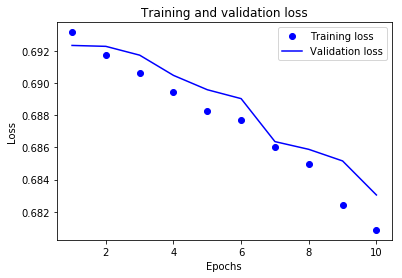

In [153]:
import matplotlib.pyplot as plt

acc = model1.history.history['acc']
val_acc = model1.history.history['val_acc']
loss = model1.history.history['loss']
val_loss = model1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

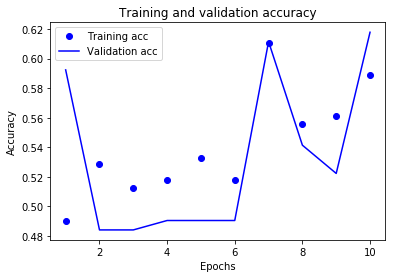

In [154]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1.save("./ModelsSaved/model1.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_loaded = load_model('./ModelsSaved/model1.h5')
model1_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_loaded.metrics_names[1], score[1]*100))

#### Case 2: With L1 Regulizer

In [155]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.initializers import Constant
from keras import regularizers

# define model
model1_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)



model1_l1.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_l1.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_l1.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.01) , activation=tf.nn.relu))
model1_l1.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_l1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_16  (None, 300)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [156]:
# compile network
model1_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
# train the model
model1_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 13s - loss: 3.5152 - acc: 0.5314 - val_loss: 3.0045 - val_acc: 0.4841
Epoch 2/10
 - 6s - loss: 2.5933 - acc: 0.5164 - val_loss: 2.1742 - val_acc: 0.4841
Epoch 3/10
 - 6s - loss: 1.8540 - acc: 0.5123 - val_loss: 1.5338 - val_acc: 0.4841
Epoch 4/10
 - 5s - loss: 1.2999 - acc: 0.5123 - val_loss: 1.0753 - val_acc: 0.4841
Epoch 5/10
 - 5s - loss: 0.9290 - acc: 0.5123 - val_loss: 0.8021 - val_acc: 0.4841
Epoch 6/10
 - 6s - loss: 0.7434 - acc: 0.5123 - val_loss: 0.7138 - val_acc: 0.4841
Epoch 7/10
 - 5s - loss: 0.7060 - acc: 0.5123 - val_loss: 0.7018 - val_acc: 0.4841
Epoch 8/10
 - 5s - loss: 0.6999 - acc: 0.5123 - val_loss: 0.6999 - val_acc: 0.4841
Epoch 9/10
 - 5s - loss: 0.6990 - acc: 0.5123 - val_loss: 0.6998 - val_acc: 0.4841
Epoch 10/10
 - 5s - loss: 0.6988 - acc: 0.5123 - val_loss: 0.6997 - val_acc: 0.4841


In [159]:
# evaluate the model on test set
model1_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.4585987264942971

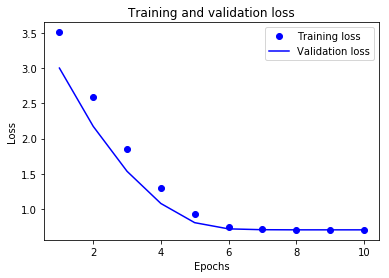

In [160]:
acc = model1_l1.history.history['acc']
val_acc = model1_l1.history.history['val_acc']
loss = model1_l1.history.history['loss']
val_loss = model1_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

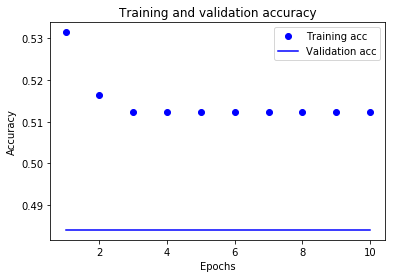

In [161]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_l1.save("./ModelsSaved/model1_l1.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_l1_loaded = load_model('./ModelsSaved/model1_l1.h5')
model1_l1_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_l1_loaded.metrics_names[1], score[1]*100))

#### Case 3: L2 Regulizer

In [98]:
# define model
model1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)



model1_l2.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_l2.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_l2.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01) , activation=tf.nn.relu))
model1_l2.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_l2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_7 ( (None, 300)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [99]:
# compile network
model1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 10s - loss: 0.9321 - acc: 0.4713 - val_loss: 0.8704 - val_acc: 0.5159
Epoch 2/10
 - 6s - loss: 0.8298 - acc: 0.5137 - val_loss: 0.7922 - val_acc: 0.4904
Epoch 3/10
 - 6s - loss: 0.7681 - acc: 0.5191 - val_loss: 0.7466 - val_acc: 0.4968
Epoch 4/10
 - 6s - loss: 0.7327 - acc: 0.5109 - val_loss: 0.7209 - val_acc: 0.4968
Epoch 5/10
 - 6s - loss: 0.7131 - acc: 0.5260 - val_loss: 0.7071 - val_acc: 0.4968
Epoch 6/10
 - 6s - loss: 0.7027 - acc: 0.5150 - val_loss: 0.6998 - val_acc: 0.5032
Epoch 7/10
 - 6s - loss: 0.6974 - acc: 0.5205 - val_loss: 0.6965 - val_acc: 0.4968
Epoch 8/10
 - 6s - loss: 0.6950 - acc: 0.5178 - val_loss: 0.6945 - val_acc: 0.4968
Epoch 9/10
 - 6s - loss: 0.6936 - acc: 0.5219 - val_loss: 0.6942 - val_acc: 0.4713
Epoch 10/10
 - 7s - loss: 0.6931 - acc: 0.5219 - val_loss: 0.6938 - val_acc: 0.4968


In [100]:
# evaluate the model on test set
model1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.4904458560761373

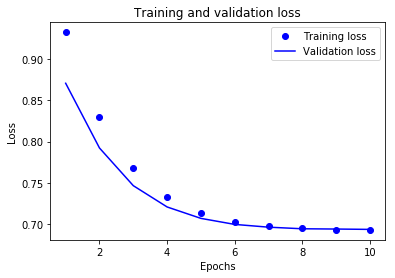

In [102]:
acc = model1_l2.history.history['acc']
val_acc = model1_l2.history.history['val_acc']
loss = model1_l2.history.history['loss']
val_loss = model1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

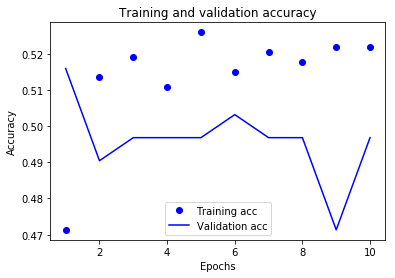

In [103]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_l2.save("./ModelsSaved/model1_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_l2_loaded = load_model('./ModelsSaved/model1_l2.h5')
model1_l2_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_l2_loaded.metrics_names[1], score[1]*100))

#### Case 4: L1-L2 Regulizer
keras.regularizers.l1_l2(l1=0.01, l2=0.01)

In [104]:
# define model
model1_l1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)


model1_l1_l2.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_l1_l2.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_l1_l2.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01) , activation=tf.nn.relu))
model1_l1_l2.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_l1_l2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_8 ( (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [105]:
# compile network
model1_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 10s - loss: 3.7683 - acc: 0.5164 - val_loss: 3.1963 - val_acc: 0.5032
Epoch 2/10
 - 6s - loss: 2.7465 - acc: 0.5150 - val_loss: 2.2903 - val_acc: 0.4841
Epoch 3/10
 - 6s - loss: 1.9464 - acc: 0.5123 - val_loss: 1.6063 - val_acc: 0.4841
Epoch 4/10
 - 6s - loss: 1.3625 - acc: 0.5123 - val_loss: 1.1291 - val_acc: 0.4841
Epoch 5/10
 - 6s - loss: 0.9761 - acc: 0.5123 - val_loss: 0.8386 - val_acc: 0.4841
Epoch 6/10
 - 6s - loss: 0.7664 - acc: 0.5123 - val_loss: 0.7167 - val_acc: 0.4841
Epoch 7/10
 - 6s - loss: 0.7082 - acc: 0.5123 - val_loss: 0.7031 - val_acc: 0.4841
Epoch 8/10
 - 6s - loss: 0.7003 - acc: 0.5123 - val_loss: 0.7001 - val_acc: 0.4841
Epoch 9/10
 - 6s - loss: 0.6990 - acc: 0.5123 - val_loss: 0.6996 - val_acc: 0.4841
Epoch 10/10
 - 6s - loss: 0.6988 - acc: 0.5123 - val_loss: 0.6997 - val_acc: 0.4841


In [106]:
# evaluate the model on test set
model1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.4904458560761373

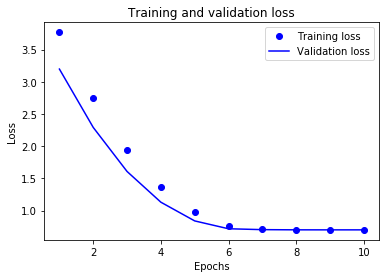

In [108]:
acc = model1_l1_l2.history.history['acc']
val_acc = model1_l1_l2.history.history['val_acc']
loss = model1_l1_l2.history.history['loss']
val_loss = model1_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

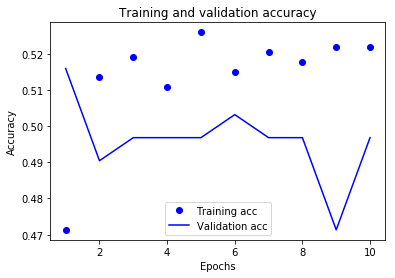

In [107]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_l1_l2.save("./ModelsSaved/model1_l1_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_l1_l2_loaded = load_model('./ModelsSaved/model1_l1_l2.h5')
model1_l1_l2_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_l1_l2_loaded.metrics_names[1], score[1]*100))

#### Case 5: Dropout Layer

In [137]:
# define model
model1_drop = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1_drop.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_drop.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_drop.add(keras.layers.Dense(16, activation=tf.nn.relu))
model1_drop.add(keras.layers.Dropout(0.5))
model1_drop.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_drop.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_14  (None, 300)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                4816      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [138]:
# compile network
model1_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_drop.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 12s - loss: 0.6934 - acc: 0.5123 - val_loss: 0.6929 - val_acc: 0.5223
Epoch 2/10
 - 5s - loss: 0.6939 - acc: 0.4945 - val_loss: 0.6931 - val_acc: 0.4841
Epoch 3/10
 - 6s - loss: 0.6922 - acc: 0.4932 - val_loss: 0.6924 - val_acc: 0.4904
Epoch 4/10
 - 6s - loss: 0.6906 - acc: 0.5342 - val_loss: 0.6921 - val_acc: 0.4841
Epoch 5/10
 - 5s - loss: 0.6926 - acc: 0.5273 - val_loss: 0.6913 - val_acc: 0.5732
Epoch 6/10
 - 5s - loss: 0.6902 - acc: 0.5615 - val_loss: 0.6911 - val_acc: 0.5541
Epoch 7/10
 - 6s - loss: 0.6901 - acc: 0.5574 - val_loss: 0.6905 - val_acc: 0.5605
Epoch 8/10
 - 5s - loss: 0.6901 - acc: 0.5478 - val_loss: 0.6897 - val_acc: 0.5860
Epoch 9/10
 - 5s - loss: 0.6889 - acc: 0.5560 - val_loss: 0.6895 - val_acc: 0.5287
Epoch 10/10
 - 6s - loss: 0.6872 - acc: 0.5574 - val_loss: 0.6893 - val_acc: 0.4904


In [139]:
# evaluate the model on test set
model1_drop.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.46496815324588947

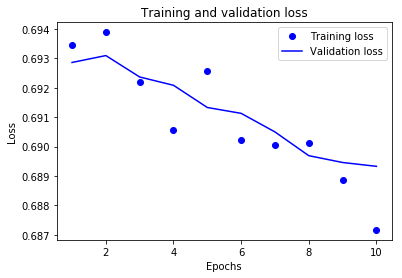

In [140]:
acc = model1_drop.history.history['acc']
val_acc = model1_drop.history.history['val_acc']
loss = model1_drop.history.history['loss']
val_loss = model1_drop.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

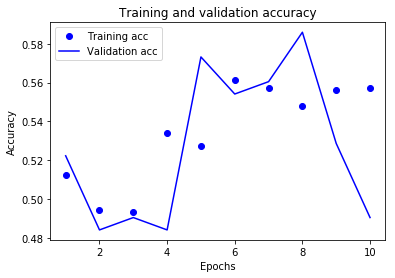

In [141]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_drop.save("./ModelsSaved/model1_drop.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_drop_loaded = load_model('./ModelsSaved/model1_drop.h5')
model1_drop_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_drop.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_drop_loaded.metrics_names[1], score[1]*100))

#### Case 6: Dropout Layer + l1

In [115]:
# define model
model1_drop_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1_drop_l1.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_drop_l1.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_drop_l1.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.01) ,activation=tf.nn.relu))
model1_drop_l1.add(keras.layers.Dropout(0.5))
model1_drop_l1.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_drop_l1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_11  (None, 300)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [116]:
# compile network
model1_drop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_drop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 11s - loss: 3.5521 - acc: 0.5519 - val_loss: 3.0395 - val_acc: 0.5669
Epoch 2/10
 - 6s - loss: 2.6259 - acc: 0.5191 - val_loss: 2.2046 - val_acc: 0.5605
Epoch 3/10
 - 6s - loss: 1.8755 - acc: 0.5137 - val_loss: 1.5476 - val_acc: 0.4841
Epoch 4/10
 - 6s - loss: 1.3112 - acc: 0.5123 - val_loss: 1.0853 - val_acc: 0.4841
Epoch 5/10
 - 6s - loss: 0.9371 - acc: 0.5123 - val_loss: 0.8086 - val_acc: 0.4841
Epoch 6/10
 - 6s - loss: 0.7472 - acc: 0.5123 - val_loss: 0.7142 - val_acc: 0.4841
Epoch 7/10
 - 6s - loss: 0.7066 - acc: 0.5123 - val_loss: 0.7020 - val_acc: 0.4841
Epoch 8/10
 - 6s - loss: 0.7000 - acc: 0.5123 - val_loss: 0.7001 - val_acc: 0.4841
Epoch 9/10
 - 6s - loss: 0.6990 - acc: 0.5123 - val_loss: 0.6997 - val_acc: 0.4841
Epoch 10/10
 - 6s - loss: 0.6988 - acc: 0.5123 - val_loss: 0.6999 - val_acc: 0.4841


In [117]:
# evaluate the model on test set
model1_drop_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.4585987264942971

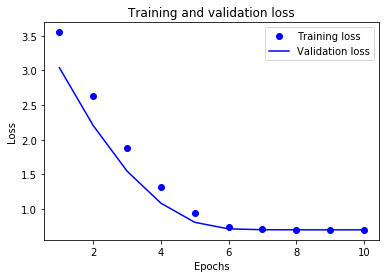

In [118]:
acc = model1_drop_l1.history.history['acc']
val_acc = model1_drop_l1.history.history['val_acc']
loss = model1_drop_l1.history.history['loss']
val_loss = model1_drop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

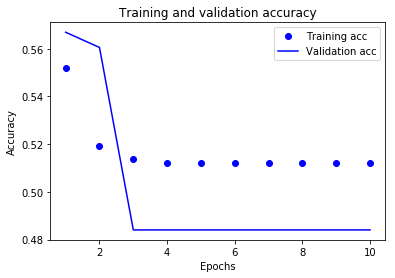

In [119]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_drop_l1.save("./ModelsSaved/model1_drop_l1.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_drop_l1_loaded = load_model('./ModelsSaved/model1_drop_l1.h5')
model1_drop_l1_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_drop_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_drop_l1_loaded.metrics_names[1], score[1]*100))

#### Case 7: Dropout Layer + l2

In [121]:
# define model
model1_drop_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1_drop_l2.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_drop_l2.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_drop_l2.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.01) ,activation=tf.nn.relu))
model1_drop_l2.add(keras.layers.Dropout(0.5))
model1_drop_l2.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_drop_l2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_12  (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [122]:
# compile network
model1_drop_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_drop_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 11s - loss: 3.5702 - acc: 0.4495 - val_loss: 3.0577 - val_acc: 0.4777
Epoch 2/10
 - 6s - loss: 2.6429 - acc: 0.5232 - val_loss: 2.2174 - val_acc: 0.4713
Epoch 3/10
 - 6s - loss: 1.8883 - acc: 0.5150 - val_loss: 1.5599 - val_acc: 0.4841
Epoch 4/10
 - 6s - loss: 1.3200 - acc: 0.5123 - val_loss: 1.0909 - val_acc: 0.4841
Epoch 5/10
 - 6s - loss: 0.9390 - acc: 0.5123 - val_loss: 0.8079 - val_acc: 0.4841
Epoch 6/10
 - 6s - loss: 0.7466 - acc: 0.5123 - val_loss: 0.7141 - val_acc: 0.4841
Epoch 7/10
 - 6s - loss: 0.7064 - acc: 0.5123 - val_loss: 0.7021 - val_acc: 0.4841
Epoch 8/10
 - 6s - loss: 0.7000 - acc: 0.5123 - val_loss: 0.7002 - val_acc: 0.4841
Epoch 9/10
 - 6s - loss: 0.6991 - acc: 0.5123 - val_loss: 0.6998 - val_acc: 0.4841
Epoch 10/10
 - 6s - loss: 0.6989 - acc: 0.5123 - val_loss: 0.6999 - val_acc: 0.4841


In [123]:
# evaluate the model on test set
model1_drop_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.4585987264942971

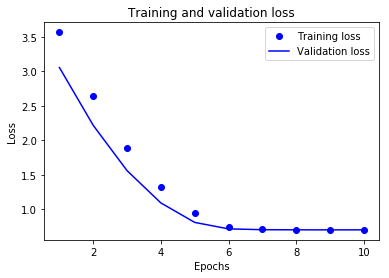

In [124]:
acc = model1_drop_l2.history.history['acc']
val_acc = model1_drop_l2.history.history['val_acc']
loss = model1_drop_l2.history.history['loss']
val_loss = model1_drop_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

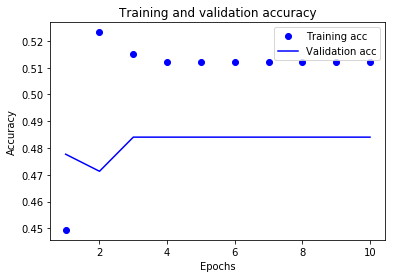

In [125]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_drop_l2.save("./ModelsSaved/model1_drop_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_drop_l2_loaded = load_model('./ModelsSaved/model1_drop_l2.h5')
model1_drop_l2_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_drop_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_drop_l2_loaded.metrics_names[1], score[1]*100))

#### Case 8: Dropout Layer + l1 + l2

In [126]:
# define model
model1_drop_l1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix), # the one we filled by hand and already learnt
                            input_length=max_length,
                            trainable=False)

model1_drop_l1_l2.add(embedding_layer) # Output is 3D tensor with shape: (batch_size, sequence_length, output_dim).
# We need GAP to not get an error: ValueError: Error when checking target: expected dense_8 to have
# 3 dimensions, but got array with shape (644, 1)
model1_drop_l1_l2.add(keras.layers.GlobalAveragePooling1D()) #It flattens as well.
model1_drop_l1_l2.add(keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01) ,activation=tf.nn.relu))
model1_drop_l1_l2.add(keras.layers.Dropout(0.5))
model1_drop_l1_l2.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
print(model1_drop_l1_l2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
global_average_pooling1d_13  (None, 300)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                4816      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 6,968,133
Trainable params: 4,833
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [127]:
# compile network
model1_drop_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model1_drop_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 11s - loss: 3.7491 - acc: 0.4795 - val_loss: 3.1749 - val_acc: 0.5478
Epoch 2/10
 - 6s - loss: 2.7242 - acc: 0.5724 - val_loss: 2.2696 - val_acc: 0.5796
Epoch 3/10
 - 6s - loss: 1.9296 - acc: 0.6107 - val_loss: 1.5910 - val_acc: 0.6051
Epoch 4/10
 - 6s - loss: 1.3481 - acc: 0.5219 - val_loss: 1.1178 - val_acc: 0.4777
Epoch 5/10
 - 6s - loss: 0.9675 - acc: 0.5123 - val_loss: 0.8332 - val_acc: 0.4841
Epoch 6/10
 - 6s - loss: 0.7638 - acc: 0.5123 - val_loss: 0.7168 - val_acc: 0.4841
Epoch 7/10
 - 6s - loss: 0.7080 - acc: 0.5123 - val_loss: 0.7030 - val_acc: 0.4841
Epoch 8/10
 - 6s - loss: 0.7005 - acc: 0.5123 - val_loss: 0.7000 - val_acc: 0.4841
Epoch 9/10
 - 6s - loss: 0.6990 - acc: 0.5123 - val_loss: 0.6998 - val_acc: 0.4841
Epoch 10/10
 - 6s - loss: 0.6989 - acc: 0.5123 - val_loss: 0.6997 - val_acc: 0.4841


In [128]:
# evaluate the model on test set
model1_drop_l1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 1s 7ms/step


0.4585987264942971

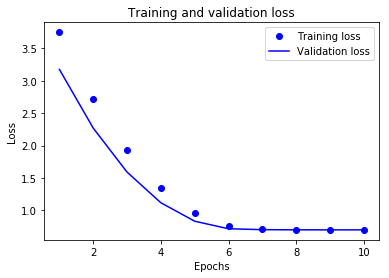

In [129]:
acc = model1_drop_l1_l2.history.history['acc']
val_acc = model1_drop_l1_l2.history.history['val_acc']
loss = model1_drop_l1_l2.history.history['loss']
val_loss = model1_drop_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

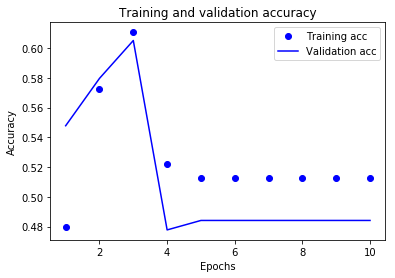

In [130]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model1_drop_l1_l2.save("./ModelsSaved/model1_drop_l1_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model1_drop_l1_l2_loaded = load_model('./ModelsSaved/model1_drop_l1_l2.h5')
model1_drop_l1_l2_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model1_drop_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1_drop_l1_l2_loaded.metrics_names[1], score[1]*100))

### Model 2: Convolutional Neural Network with max pooling (3 hidden layers)
#### Case 1: Normal

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant


# define model
model2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model2.add(embedding_layer)
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2.summary())

# compile network
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 184s - loss: 0.7104 - acc: 0.5861 - val_loss: 0.5622 - val_ac

In [134]:
# evaluate the model on test set
model2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 11s 71ms/step


0.8662420389758554

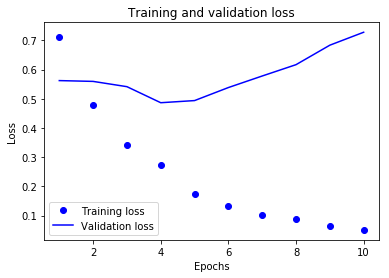

In [135]:
acc = model2.history.history['acc']
val_acc = model2.history.history['val_acc']
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

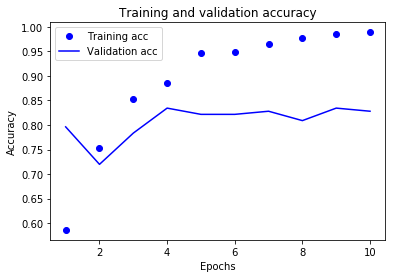

In [136]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model2.save("./ModelsSaved/model2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_loaded = load_model('./ModelsSaved/model2.h5')
model2_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_loaded.metrics_names[1], score[1]*100))

#### Case 2: With L1 Regulizer in CNN layer

In [142]:
# define model
model2_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model2_l1.add(embedding_layer)
model2_l1.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=keras.regularizers.l1(0.01) , activation='relu'))
model2_l1.add(MaxPooling1D(pool_size=2))
model2_l1.add(Flatten())
model2_l1.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_l1.summary())

# compile network
model2_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 134s - loss: 34.6218 - acc: 0.5396 - val_loss: 18.8300 - val_

In [143]:
# evaluate the model on test set
model2_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 11s 73ms/step


0.7133757942801069

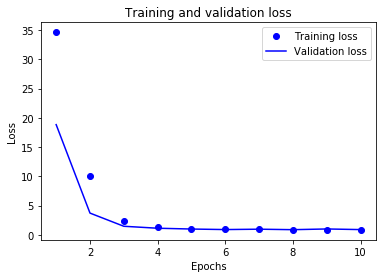

In [144]:
loss = model2_l1.history.history['loss']
val_loss = model2_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

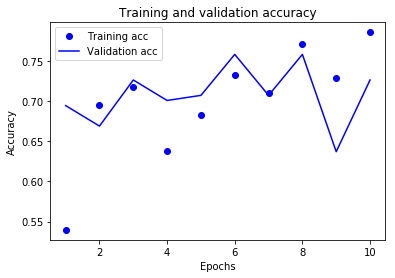

In [147]:
plt.clf()   # clear figure

acc = model2_l1.history.history['acc']
val_acc =model2_l1.history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model2_l1.save("./ModelsSaved/model2_l1.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_l1_loaded = load_model('./ModelsSaved/model2_l1.h5')
model2_l1_loaded.summary()

# evaluate the loaded model on test data (not training nor validation data)
score = model2_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_l1_loaded.metrics_names[1], score[1]*100))

#### Case 3: L2 Regulizer in CNN layer

In [162]:
# define model
model2_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model2_l2.add(embedding_layer)
model2_l2.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=keras.regularizers.l2(0.01) , activation='relu'))
model2_l2.add(MaxPooling1D(pool_size=2))
model2_l2.add(Flatten())
model2_l2.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_l2.summary())

# compile network
model2_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 135s - loss: 2.1952 - acc: 0.5478 - val_loss: 1.7046 - val_ac

In [163]:
# evaluate the model on test set
model2_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 12s 75ms/step


0.8535031896487922

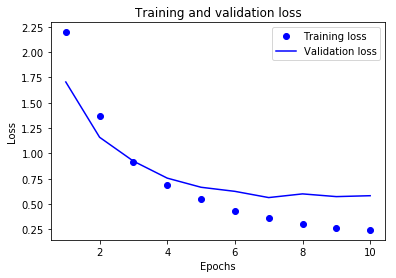

In [164]:
loss = model2_l2.history.history['loss']
val_loss = model2_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

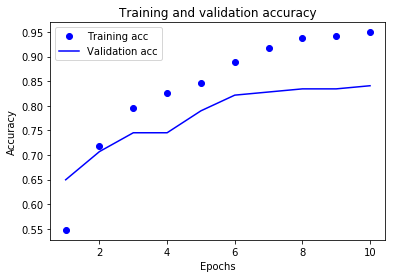

In [165]:
acc = model2_l2.history.history['acc']
val_acc =model2_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [173]:
#Source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

# save model and architecture to single file
model2_l2.save("./ModelsSaved/model2_l2.h5")
print("Saved model to disk")

Saved model to disk


In [174]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_l2_loaded = load_model('./ModelsSaved/model2_l2.h5')
model2_l2_loaded.summary()

# evaluate the loaded model
score = model2_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_l2_loaded.metrics_names[1], score[1]*100))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 85.35%


#### Case 4: L1 L2 Regulizers in CNN layer

In [166]:
# define model
model2_l1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model2_l1_l2.add(embedding_layer)
model2_l1_l2.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01) , activation='relu'))
model2_l1_l2.add(MaxPooling1D(pool_size=2))
model2_l1_l2.add(Flatten())
model2_l1_l2.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_l1_l2.summary())

# compile network
model2_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 144s - loss: 36.2656 - acc: 0.5861 - val_loss: 19.6854 - val_

In [167]:
# evaluate the model on test set
model2_l1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 11s 69ms/step


0.7006369407769222

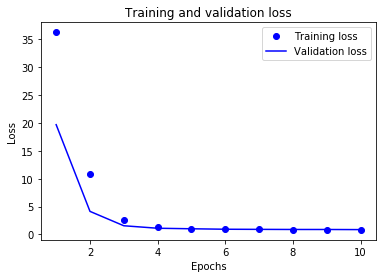

In [168]:
loss = model2_l1_l2.history.history['loss']
val_loss = model2_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

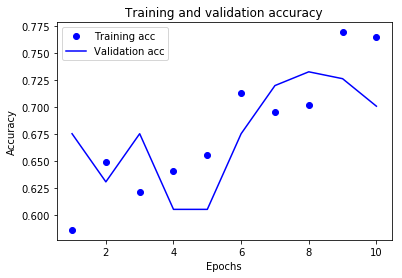

In [169]:
acc = model2_l1_l2.history.history['acc']
val_acc =model2_l1_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# save model and architecture to single file
model2_l1_l2.save("./ModelsSaved/model2_l1_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_l1_l2_loaded = load_model('./ModelsSaved/model2_l1_l2.h5')
model2_l1_l2_loaded.summary()

# evaluate the loaded model
score = model2_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_l2_loaded.metrics_names[1], score[1]*100))


#### Case 5: Dropout Layer

In [180]:
# define model
model2_drop = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
#Dropout in conv layer may lose some important features but we can apply regulizers
model2_drop.add(embedding_layer)
model2_drop.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2_drop.add(MaxPooling1D(pool_size=2))
model2_drop.add(Flatten())
model2_drop.add(keras.layers.Dropout(0.5))
model2_drop.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_drop.summary())

# compile network
model2_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_drop.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

In [181]:
# evaluate the model on test set
model2_drop.evaluate(x_test, y_test)[1]

157/157 [==============================] - 11s 72ms/step


0.8662420423926821

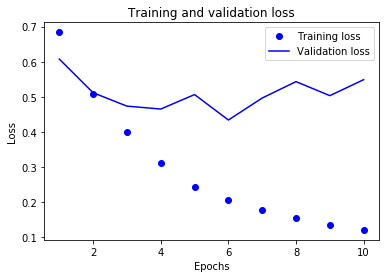

In [182]:
loss = model2_drop.history.history['loss']
val_loss = model2_drop.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

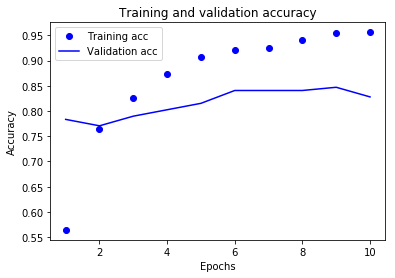

In [184]:
acc = model2_drop.history.history['acc']
val_acc =model2_drop.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [185]:
# save model and architecture to single file
model2_drop.save("./ModelsSaved/model2_drop.h5")
print("Saved model to disk")

Saved model to disk


In [186]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_drop_loaded = load_model('./ModelsSaved/model2_drop.h5')
model2_drop_loaded.summary()

# evaluate the loaded model
score = model2_drop_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_drop_loaded.metrics_names[1], score[1]*100))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

#### Case 6: Dropout Layer + l1 in CNN layer

In [187]:
# define model
model2_drop_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
#Dropout in conv layer may lose some important features but we can apply regulizers
model2_drop_l1.add(embedding_layer)
model2_drop_l1.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=keras.regularizers.l1(0.01), activation='relu'))
model2_drop_l1.add(MaxPooling1D(pool_size=2))
model2_drop_l1.add(Flatten())
model2_drop_l1.add(keras.layers.Dropout(0.5))
model2_drop_l1.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_drop_l1.summary())

# compile network
model2_drop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_drop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

In [190]:
# evaluate the model on test set
model2_drop_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 11s 71ms/step


0.6878980906905642

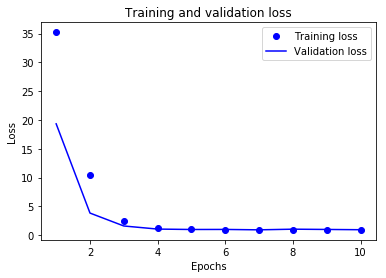

In [191]:
loss = model2_drop_l1.history.history['loss']
val_loss = model2_drop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

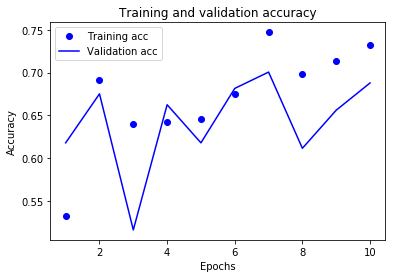

In [192]:
acc = model2_drop_l1.history.history['acc']
val_acc =model2_drop_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [193]:
# save model and architecture to single file
model2_drop_l1.save("./ModelsSaved/model2_drop_l1.h5")
print("Saved model to disk")

Saved model to disk


In [194]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_drop_l1_loaded = load_model('./ModelsSaved/model2_drop_l1.h5')
model2_drop_l1_loaded.summary()

# evaluate the loaded model
score = model2_drop_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_drop_l1_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

#### Case 7: Dropout Layer + l2 in CNN layer

In [195]:
# define model
model2_drop_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
#Dropout in conv layer may lose some important features but we can apply regulizers
model2_drop_l2.add(embedding_layer)
model2_drop_l2.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'))
model2_drop_l2.add(MaxPooling1D(pool_size=2))
model2_drop_l2.add(Flatten())
model2_drop_l2.add(keras.layers.Dropout(0.5))
model2_drop_l2.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_drop_l2.summary())

# compile network
model2_drop_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_drop_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

In [196]:
# evaluate the model on test set
model2_drop_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 12s 75ms/step


0.8152866291392381

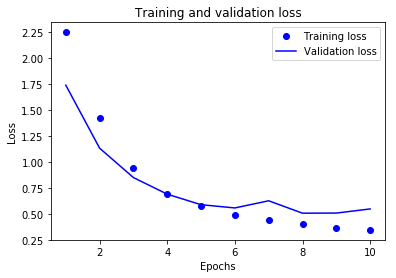

In [197]:
loss = model2_drop_l2.history.history['loss']
val_loss = model2_drop_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

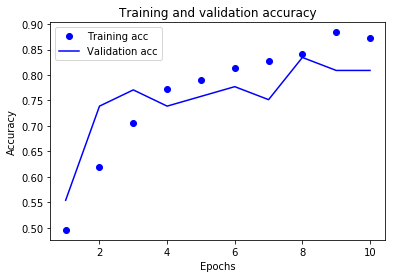

In [198]:
acc = model2_drop_l2.history.history['acc']
val_acc =model2_drop_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [199]:
# save model and architecture to single file
model2_drop_l2.save("./ModelsSaved/model2_drop_l2.h5")
print("Saved model to disk")

Saved model to disk


In [200]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_drop_l2_loaded = load_model('./ModelsSaved/model2_drop_l2.h5')
model2_drop_l2_loaded.summary()

# evaluate the loaded model
score = model2_drop_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_drop_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

#### Case 8: Dropout Layer + l1 + l2 in CNN layer

In [201]:
# define model
model2_drop_l1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
#Dropout in conv layer may lose some important features but we can apply regulizers
model2_drop_l1_l2.add(embedding_layer)
model2_drop_l1_l2.add(Conv1D(filters=128, kernel_size=5, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01), activation='relu'))
model2_drop_l1_l2.add(MaxPooling1D(pool_size=2))
model2_drop_l1_l2.add(Flatten())
model2_drop_l1_l2.add(keras.layers.Dropout(0.5))
model2_drop_l1_l2.add(Dense(1, activation='sigmoid')) #CNN colliding with ANN
print(model2_drop_l1_l2.summary())

# compile network
model2_drop_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model
model2_drop_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

In [202]:
# evaluate the model on test set
model2_drop_l1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 11s 69ms/step


0.8216560551315356

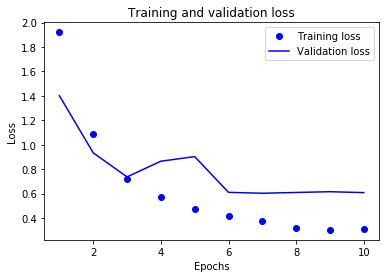

In [205]:
loss = model2_drop_l1_l2.history.history['loss']
val_loss = model2_drop_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

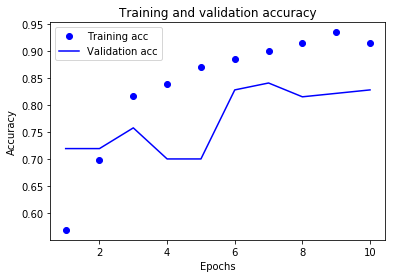

In [206]:
acc = model2_drop_l1_l2.history.history['acc']
val_acc =model2_drop_l1_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [207]:
# save model and architecture to single file
model2_drop_l1_l2.save("./ModelsSaved/model2_drop_l1_l2.h5")
print("Saved model to disk")

Saved model to disk


In [208]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model2_drop_l1_l2_loaded = load_model('./ModelsSaved/model2_drop_l1_l2.h5')
model2_drop_l1_l2_loaded.summary()

# evaluate the loaded model
score = model2_drop_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2_drop_l1_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6400, 128)         192128    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 3200, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 409600)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 409601    
Total params: 7,565,029
Trainable params: 601,729
Non-trainable params: 6,963,300
____________________________________________________________

### Model 3: RNN's GRU 
The time to train a GRU is less than LSTM network.

#### Case 1: Normal

In [175]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant


# From Keras official website
# dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the INPUTS.
# recurrent_dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the RECURRENT STATE.


# define model
model3 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3.add(embedding_layer)
#model3.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3.add(GRU(units=32))
model3.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3.summary())

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [176]:
print('Train...')
model3.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 112s - loss: 0.7032 - acc: 0.5164 - val_loss: 0.6931 - val_acc: 0.5159
Epoch 2/10
 - 107s - loss: 0.6671 - acc: 0.5505 - val_loss: 0.7311 - val_acc: 0.5032
Epoch 3/10
 - 109s - loss: 0.6455 - acc: 0.6339 - val_loss: 0.7574 - val_acc: 0.4968
Epoch 4/10
 - 118s - loss: 0.6167 - acc: 0.6913 - val_loss: 0.8713 - val_acc: 0.4650
Epoch 5/10
 - 114s - loss: 0.5842 - acc: 0.7049 - val_loss: 0.9372 - val_acc: 0.4395
Epoch 6/10
 - 112s - loss: 0.5477 - acc: 0.7350 - val_loss: 0.9831 - val_acc: 0.4459
Epoch 7/10
 - 116s - loss: 0.5194 - acc: 0.7541 - val_loss: 0.9645 - val_acc: 0.4395
Epoch 8/10
 - 113s - loss: 0.5159 - acc: 0.7691 - val_loss: 0.9985 - val_acc: 0.4904
Epoch 9/10
 - 123s - loss: 0.4958 - acc: 0.7678 - val_loss: 1.0044 - val_acc: 0.4140
Epoch 10/10
 - 115s - loss: 0.4914 - acc: 0.7664 - val_loss: 1.0522 - val_acc: 0.4522


In [177]:
# --> Didn't generalize well.
# evaluate the model on test set
model3.evaluate(x_test, y_test)[1]

157/157 [==============================] - 7s 47ms/step


0.7770700610367356

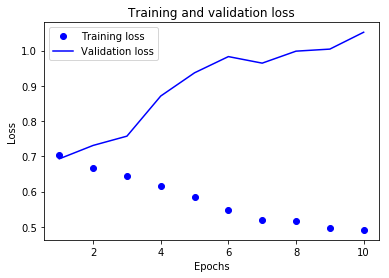

In [178]:
loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

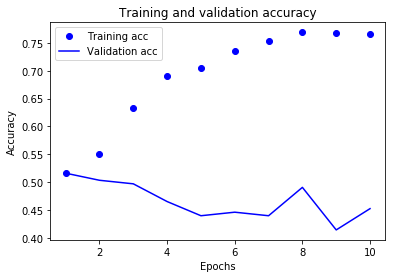

In [179]:
acc = model3.history.history['acc']
val_acc =model3.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [188]:
# save model and architecture to single file
model3.save("./ModelsSaved/model3.h5")
print("Saved model to disk")

Saved model to disk


In [189]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_loaded = load_model('./ModelsSaved/model3.h5')
model3_loaded.summary()

# evaluate the loaded model
score = model3_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 77.71%


#### Case 2: With L1 Regulizer in GRU layer

In [220]:
# define model
model3_l1 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_l1.add(embedding_layer)
#model3.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3_l1.add(GRU(units=32, kernel_regularizer=keras.regularizers.l1(0.01)))
model3_l1.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_l1.summary())

print('Train...')
model3_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 152s - loss: 15.4974 - acc: 0.5314 - val_loss: 12.5587 - val_acc: 0.5223
Epoch 2/10
 - 124s - loss: 10.2415 - acc: 0.5806 - val_loss: 7.9523 - val_acc: 0.4968
Epoch 3/10
 - 129s - loss: 6.1748 - acc: 0.5492 - val_loss: 4.5049 - val_acc: 0.4968
Epoch 4/10
 - 129s - loss: 3.2873 - acc: 0.

In [221]:
# evaluate the model on test set
model3_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 8s 54ms/step


0.738853504703303

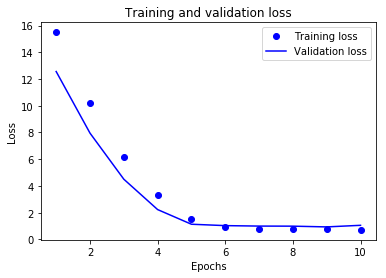

In [222]:
loss = model3_l1.history.history['loss']
val_loss = model3_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

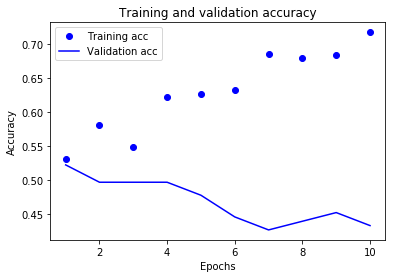

In [224]:
acc = model3_l1.history.history['acc']
val_acc =model3_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [225]:
# save model and architecture to single file
model3_l1.save("./ModelsSaved/model3_l1.h5")
print("Saved model to disk")

Saved model to disk


In [226]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_l1_loaded = load_model('./ModelsSaved/model3_l1.h5')
model3_l1_loaded.summary()

# evaluate the loaded model
score = model3_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_l1_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 73.89%


#### Case 3: With L2 Regulizer in GRU Layer

In [214]:
# define model
model3_l2 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_l2.add(embedding_layer)
#model3.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3_l2.add(GRU(units=32, kernel_regularizer=keras.regularizers.l2(0.01)))
model3_l2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_l2.summary())

print('Train...')
model3_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 152s - loss: 1.8343 - acc: 0.5355 - val_loss: 1.5722 - val_acc: 0.5350
Epoch 2/10
 - 126s - loss: 1.3586 - acc: 0.6052 - val_loss: 1.2512 - val_acc: 0.4713
Epoch 3/10
 - 125s - loss: 1.0655 - acc: 0.6079 - val_loss: 1.0609 - val_acc: 0.5159
Epoch 4/10
 - 121s - loss: 0.8881 - acc: 0.665

In [215]:
# evaluate the model on test set
model3_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 8s 53ms/step


0.7770700652128572

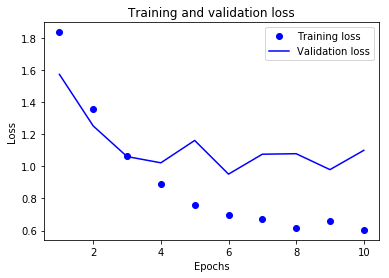

In [216]:
loss = model3_l2.history.history['loss']
val_loss = model3_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

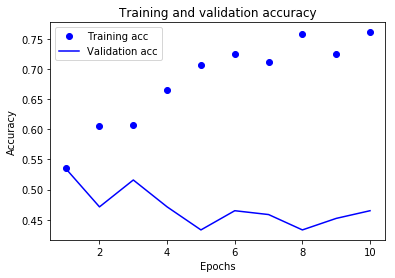

In [217]:
acc = model3_l2.history.history['acc']
val_acc =model3_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [218]:
# save model and architecture to single file
model3_l2.save("./ModelsSaved/model3_l2.h5")
print("Saved model to disk")

Saved model to disk


In [219]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_l2_loaded = load_model('./ModelsSaved/model3_l2.h5')
model3_l2_loaded.summary()

# evaluate the loaded model
score = model3_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 77.71%


#### Case 4: With L1 and L2 Regulizer in GRU Layer

In [228]:
# define model
model3_l1_l2 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_l1_l2.add(embedding_layer)
#model3.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3_l1_l2.add(GRU(units=32, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model3_l1_l2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_l1_l2.summary())

print('Train...')
model3_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_10 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 165s - loss: 16.7893 - acc: 0.5533 - val_loss: 13.5048 - val_acc: 0.4904
Epoch 2/10
 - 136s - loss: 10.9232 - acc: 0.5478 - val_loss: 8.4153 - val_acc: 0.4268
Epoch 3/10
 - 130s - loss: 6.4894 - acc: 0.5560 - val_loss: 4.6928 - val_acc: 0.4968
Epoch 4/10
 - 128s - loss: 3.4186 - acc: 0.

In [229]:
# evaluate the model on test set
model3_l1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 9s 56ms/step


0.6433121041887125

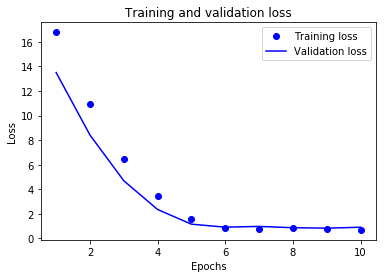

In [230]:
loss = model3_l1_l2.history.history['loss']
val_loss = model3_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

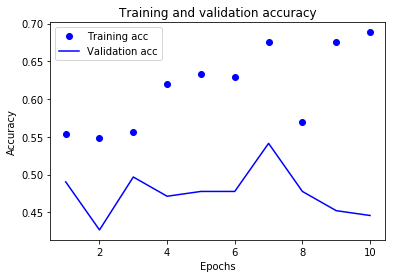

In [231]:
acc = model3_l1_l2.history.history['acc']
val_acc =model3_l1_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [232]:
# save model and architecture to single file
model3_l1_l2.save("./ModelsSaved/model3_l1_l2.h5")
print("Saved model to disk")

Saved model to disk


In [233]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_l1_l2_loaded = load_model('./ModelsSaved/model3_l1_l2.h5')
model3_l1_l2_loaded.summary()

# evaluate the loaded model
score = model3_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_l1_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_10 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 64.33%


#### Case 5: Dropout and recurrent dropout in the GRU layer
From Keras official website:
1. dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the INPUTS.
2. recurrent_dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the RECURRENT STATE.

In [234]:
# define model
model3_drop_recdrop = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_drop_recdrop.add(embedding_layer)
model3_drop_recdrop.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model3_drop_recdrop.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_drop_recdrop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_drop_recdrop.summary())

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_11 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None


In [235]:
print('Train...')
model3_drop_recdrop.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 197s - loss: 0.7056 - acc: 0.4945 - val_loss: 0.7605 - val_acc: 0.4522
Epoch 2/10
 - 173s - loss: 0.6727 - acc: 0.5369 - val_loss: 0.7704 - val_acc: 0.4522
Epoch 3/10
 - 171s - loss: 0.6757 - acc: 0.5601 - val_loss: 0.7470 - val_acc: 0.5159
Epoch 4/10
 - 172s - loss: 0.6438 - acc: 0.6298 - val_loss: 0.7523 - val_acc: 0.4841
Epoch 5/10
 - 172s - loss: 0.6283 - acc: 0.6653 - val_loss: 0.8134 - val_acc: 0.5096
Epoch 6/10
 - 179s - loss: 0.6068 - acc: 0.6694 - val_loss: 0.8164 - val_acc: 0.4713
Epoch 7/10
 - 187s - loss: 0.5852 - acc: 0.6967 - val_loss: 0.8965 - val_acc: 0.4904
Epoch 8/10
 - 193s - loss: 0.5797 - acc: 0.7090 - val_loss: 0.9131 - val_acc: 0.4586
Epoch 9/10
 - 190s - loss: 0.5618 - acc: 0.7240 - val_loss: 0.9281 - val_acc: 0.4522
Epoch 10/10
 - 236s - loss: 0.5635 - acc: 0.7391 - val_loss: 0.9647 - val_acc: 0.4904


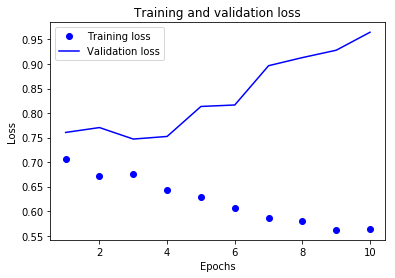

In [236]:
loss = model3_drop_recdrop.history.history['loss']
val_loss = model3_drop_recdrop.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

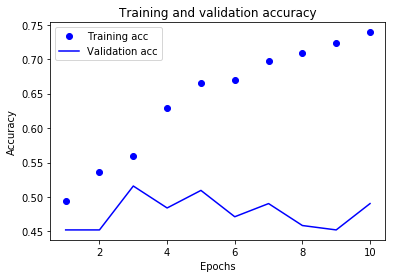

In [237]:
acc = model3_drop_recdrop.history.history['acc']
val_acc =model3_drop_recdrop.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [238]:
# evaluate the model on test set
model3_drop_recdrop.evaluate(x_test, y_test)[1]

157/157 [==============================] - 12s 76ms/step


0.7452229314548954

In [239]:
# save model and architecture to single file
model3_drop_recdrop.save("./ModelsSaved/model3_drop_recdrop.h5")
print("Saved model to disk")

Saved model to disk


In [240]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_drop_recdrop_loaded = load_model('./ModelsSaved/model3_drop_recdrop.h5')
model3_drop_recdrop_loaded.summary()

# evaluate the loaded model
score = model3_drop_recdrop_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_drop_recdrop_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_11 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 74.52%


#### Case 6: Dropout and recurrent dropout in the GRU layer with L1 regulizer in GRU Layer

In [241]:
# define model
model3_drop_recdrop_l1 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_drop_recdrop_l1.add(embedding_layer)
model3_drop_recdrop_l1.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l1(0.01) ))
model3_drop_recdrop_l1.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_drop_recdrop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_drop_recdrop_l1.summary())

print('Train...')
model3_drop_recdrop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_12 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 244s - loss: 15.5683 - acc: 0.5273 - val_loss: 12.6492 - val_acc: 0.4586
Epoch 2/10
 - 209s - loss: 10.3178 - acc: 0.5683 - val_loss: 8.0005 - val_acc: 0.4841
Epoch 3/10
 - 192s - loss: 6.2325 - acc: 0.5697 - val_loss: 4.5399 - val_acc: 0.4777
Epoch 4/10
 - 215s - loss: 3.3175 - acc: 0.

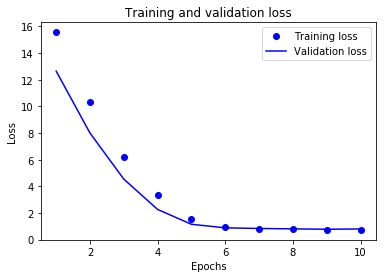

In [242]:
loss = model3_drop_recdrop_l1.history.history['loss']
val_loss = model3_drop_recdrop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

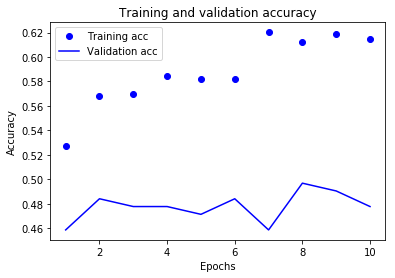

In [243]:
acc = model3_drop_recdrop_l1.history.history['acc']
val_acc =model3_drop_recdrop_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [244]:
# evaluate the model on test set
model3_drop_recdrop_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 13s 84ms/step


0.6178343937655163

In [245]:
# save model and architecture to single file
model3_drop_recdrop_l1.save("./ModelsSaved/model3_drop_recdrop_l1.h5")
print("Saved model to disk")

Saved model to disk


In [246]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_drop_recdrop_l1_loaded = load_model('./ModelsSaved/model3_drop_recdrop_l1.h5')
model3_drop_recdrop_l1_loaded.summary()

# evaluate the loaded model
score = model3_drop_recdrop_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_drop_recdrop_l1_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_12 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 61.78%


#### Case 7: Dropout and recurrent dropout in the GRU layer with L2 regulizer in GRU Layer

In [247]:
# define model
model3_drop_recdrop_l2 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_drop_recdrop_l2.add(embedding_layer)
model3_drop_recdrop_l2.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l2(0.01) ))
model3_drop_recdrop_l2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_drop_recdrop_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_drop_recdrop_l2.summary())

print('Train...')
model3_drop_recdrop_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_13 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 263s - loss: 1.8816 - acc: 0.5369 - val_loss: 1.6191 - val_acc: 0.5032
Epoch 2/10
 - 217s - loss: 1.4225 - acc: 0.5628 - val_loss: 1.3114 - val_acc: 0.4522
Epoch 3/10
 - 215s - loss: 1.1315 - acc: 0.6120 - val_loss: 1.1024 - val_acc: 0.4904
Epoch 4/10
 - 204s - loss: 0.9681 - acc: 0.603

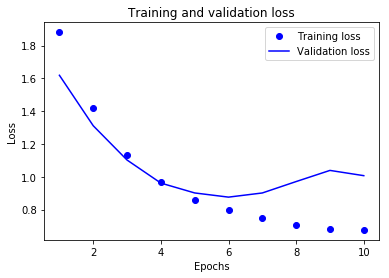

In [248]:
loss = model3_drop_recdrop_l2.history.history['loss']
val_loss = model3_drop_recdrop_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

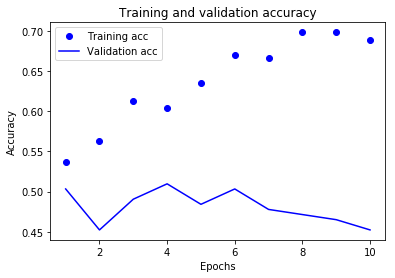

In [249]:
acc = model3_drop_recdrop_l2.history.history['acc']
val_acc =model3_drop_recdrop_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [250]:
# evaluate the model on test set
model3_drop_recdrop_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 14s 87ms/step


0.7324840813685375

In [251]:
# save model and architecture to single file
model3_drop_recdrop_l2.save("./ModelsSaved/model3_drop_recdrop_l2.h5")
print("Saved model to disk")

Saved model to disk


In [252]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_drop_recdrop_l2_loaded = load_model('./ModelsSaved/model3_drop_recdrop_l2.h5')
model3_drop_recdrop_l2_loaded.summary()

# evaluate the loaded model
score = model3_drop_recdrop_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_drop_recdrop_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_13 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 73.25%


#### Case 8: Dropout and recurrent dropout in the GRU layer with L1 and L2 regulizer in GRU Layer

In [253]:
# define model
model3_drop_recdrop_l1_l2 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)
model3_drop_recdrop_l1_l2.add(embedding_layer)
model3_drop_recdrop_l1_l2.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model3_drop_recdrop_l1_l2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model3_drop_recdrop_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model3_drop_recdrop_l1_l2.summary())

print('Train...')
model3_drop_recdrop_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_test), verbose=2)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_14 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train...
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 289s - loss: 16.7120 - acc: 0.5123 - val_loss: 13.5570 - val_acc: 0.4395
Epoch 2/10
 - 231s - loss: 11.0016 - acc: 0.5273 - val_loss: 8.5479 - val_acc: 0.4777
Epoch 3/10
 - 219s - loss: 6.6567 - acc: 0.5464 - val_loss: 4.8962 - val_acc: 0.4586
Epoch 4/10
 - 246s - loss: 3.6198 - acc: 0.

In [254]:
# evaluate the model on test set
model3_drop_recdrop_l1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 15s 95ms/step


0.6751592337705528

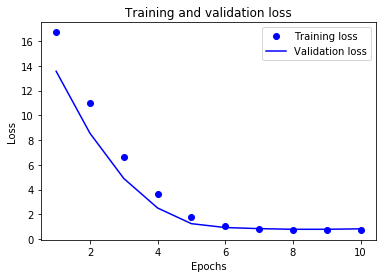

In [255]:
loss = model3_drop_recdrop_l1_l2.history.history['loss']
val_loss = model3_drop_recdrop_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

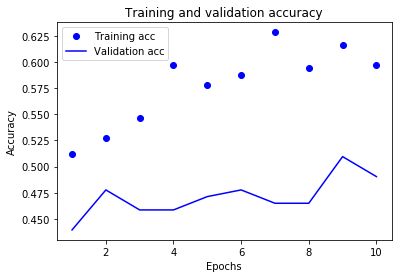

In [256]:
acc = model3_drop_recdrop_l1_l2.history.history['acc']
val_acc =model3_drop_recdrop_l1_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [257]:
# save model and architecture to single file
model3_drop_recdrop_l1_l2.save("./ModelsSaved/model3_drop_recdrop_l1_l2.h5")
print("Saved model to disk")

Saved model to disk


In [258]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model3_drop_recdrop_l1_l2_loaded = load_model('./ModelsSaved/model3_drop_recdrop_l1_l2.h5')
model3_drop_recdrop_l1_l2_loaded.summary()

# evaluate the loaded model
score = model3_drop_recdrop_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model3_drop_recdrop_l1_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
gru_14 (GRU)                 (None, 32)                31968     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 33        
Total params: 6,995,301
Trainable params: 32,001
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 67.52%


### Model 4: RNN's LSTM 

#### Case 1: Normal

In [259]:
# define model
model4 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4.add(embedding_layer)
model4.add(LSTM(32))
model4.add(Dense(1, activation='sigmoid'))
print(model4.summary())

# compile network
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 276s - loss: 0.6654 - acc: 0.5792 - val_loss: 0.6170 - val_acc: 0.6497
Epoch 2/10
 - 219s - loss: 0.6016 - acc: 0.6872 - val_loss: 0.6340 - val_acc: 0.6051
Epoch 3/10
 - 217s - loss: 0.5897 - acc: 0.6940 - val_loss: 0.5851 - val_acc: 0.7197
Epoch 4/10
 - 226s - loss: 0.5884 - acc: 0.6995 - val_loss: 0.6636 - val_acc: 0.5796


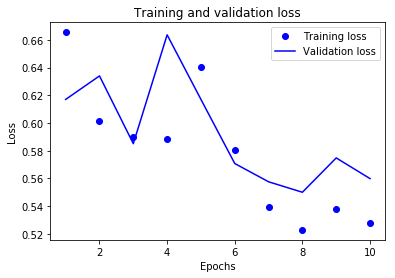

In [260]:
loss = model4.history.history['loss']
val_loss = model4.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

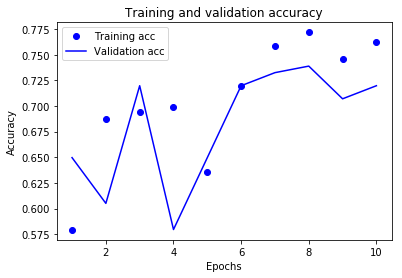

In [261]:
acc = model4.history.history['acc']
val_acc =model4.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [262]:
# evaluate the model on test set
model4.evaluate(x_test, y_test)[1]

157/157 [==============================] - 12s 76ms/step


0.7707006342851432

In [263]:
# save model and architecture to single file
model4.save("./ModelsSaved/model4.h5")
print("Saved model to disk")

Saved model to disk


In [264]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_loaded = load_model('./ModelsSaved/model4.h5')
model4_loaded.summary()

# evaluate the loaded model
score = model4_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 77.07%


#### Case 2: With L1 Regulizer in LSTM layer

In [265]:
# define model
model4_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_l1.add(embedding_layer)
model4_l1.add(LSTM(32, kernel_regularizer=keras.regularizers.l1(0.01)))
model4_l1.add(Dense(1, activation='sigmoid'))
print(model4_l1.summary())

# compile network
model4_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 318s - loss: 19.7016 - acc: 0.5287 - val_loss: 15.7695 - val_acc: 0.5287
Epoch 2/10
 - 231s - loss: 12.7067 - acc: 0.5765 - val_loss: 9.6208 - val_acc: 0.6943
Epoch 3/10
 - 244s - loss: 7.3497 - acc: 0.6585 - val_loss: 5.1497 - val_acc: 0.5605
Epoch 4/10
 - 231s - loss: 3.6336 - acc: 0.6776 - val_loss: 2.3625 - val_acc: 0.64

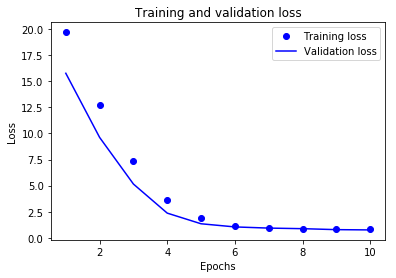

In [266]:
loss = model4_l1.history.history['loss']
val_loss = model4_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

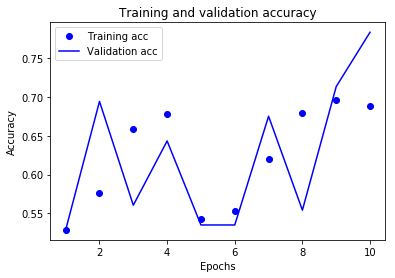

In [267]:
acc = model4_l1.history.history['acc']
val_acc =model4_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [268]:
# evaluate the model on test set
model4_l1.evaluate(x_test, y_test)[1]

157/157 [==============================] - 12s 79ms/step


0.7452229314548954

In [269]:
# save model and architecture to single file
model4_l1.save("./ModelsSaved/model4_l1.h5")
print("Saved model to disk")

Saved model to disk


In [270]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_l1_loaded = load_model('./ModelsSaved/model4_l1.h5')
model4_l1_loaded.summary()

# evaluate the loaded model
score = model4_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_l1_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 74.52%


#### Case 3: With L2 Regulizer in LSTM Layer

In [271]:
# define model
model4_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_l2.add(embedding_layer)
model4_l2.add(LSTM(32, kernel_regularizer=keras.regularizers.l2(0.01)))
model4_l2.add(Dense(1, activation='sigmoid'))
print(model4_l2.summary())

# compile network
model4_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 341s - loss: 2.1344 - acc: 0.5492 - val_loss: 1.7693 - val_acc: 0.5223
Epoch 2/10
 - 273s - loss: 1.5130 - acc: 0.6626 - val_loss: 1.3971 - val_acc: 0.7261
Epoch 3/10
 - 270s - loss: 1.3162 - acc: 0.6954 - val_loss: 1.2240 - val_acc: 0.6815
Epoch 4/10
 - 271s - loss: 1.1353 - acc: 0.7391 - val_loss: 1.1167 - val_acc: 0.6051


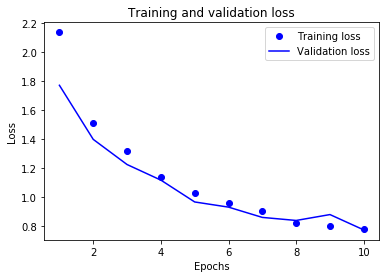

In [272]:
loss = model4_l2.history.history['loss']
val_loss = model4_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

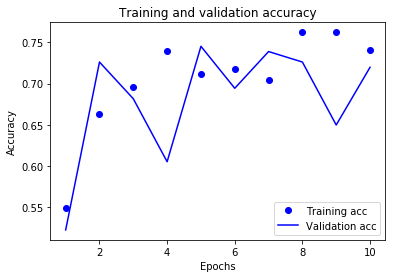

In [273]:
acc = model4_l2.history.history['acc']
val_acc =model4_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [274]:
# evaluate the model on test set
model4_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 16s 102ms/step


0.7707006418780916

In [275]:
# save model and architecture to single file
model4_l2.save("./ModelsSaved/model4_l2.h5")
print("Saved model to disk")

Saved model to disk


In [276]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_l2_loaded = load_model('./ModelsSaved/model4_l2.h5')
model4_l2_loaded.summary()

# evaluate the loaded model
score = model4_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 77.07%


#### Case 4: With L1 and L2 Regulizer in LSTM Layer

In [277]:
# define model
model4_l1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_l1_l2.add(embedding_layer)
model4_l1_l2.add(LSTM(32, kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model4_l1_l2.add(Dense(1, activation='sigmoid'))
print(model4_l1_l2.summary())

# compile network
model4_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 422s - loss: 21.1451 - acc: 0.5492 - val_loss: 16.7709 - val_acc: 0.4650
Epoch 2/10
 - 330s - loss: 13.4151 - acc: 0.5492 - val_loss: 10.0681 - val_acc: 0.6624
Epoch 3/10
 - 303s - loss: 7.6598 - acc: 0.5943 - val_loss: 5.3402 - val_acc: 0.6752
Epoch 4/10
 - 311s - loss: 3.8277 - acc: 0.5806 - val_loss: 2.4433 - val_acc: 0.5

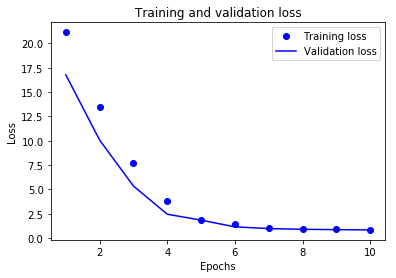

In [278]:
loss = model4_l1_l2.history.history['loss']
val_loss = model4_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

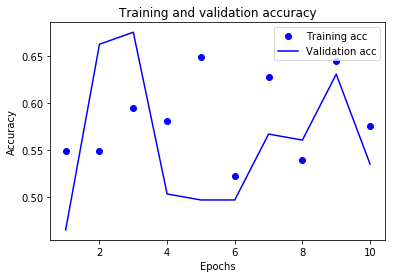

In [279]:
acc = model4_l1_l2.history.history['acc']
val_acc =model4_l1_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [280]:
# evaluate the model on test set
model4_l1_l2.evaluate(x_test, y_test)[1]

157/157 [==============================] - 14s 87ms/step


0.5541401235920609

In [281]:
# save model and architecture to single file
model4_l1_l2.save("./ModelsSaved/model4_l1_l2.h5")
print("Saved model to disk")

Saved model to disk


In [282]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_l1_l2_loaded = load_model('./ModelsSaved/model4_l1_l2.h5')
model4_l1_l2_loaded.summary()

# evaluate the loaded model
score = model4_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_l1_l2_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 55.41%


#### Case 5: Dropout and recurrent dropout in the LSTM layer

In [283]:
# define model
model4_drop_recdrop = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_drop_recdrop.add(embedding_layer)
model4_drop_recdrop.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model4_drop_recdrop.add(Dense(1, activation='sigmoid'))
print(model4_drop_recdrop.summary())

# compile network
model4_drop_recdrop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_drop_recdrop.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
None
Train on 732 samples, validate on 157 samples
Epoch 1/10
 - 664s - loss: 0.6925 - acc: 0.5478 - val_loss: 0.6705 - val_acc: 0.4841
Epoch 2/10
 - 503s - loss: 0.6469 - acc: 0.6325 - val_loss: 0.6053 - val_acc: 0.6752
Epoch 3/10
 - 506s - loss: 0.6150 - acc: 0.6762 - val_loss: 0.5868 - val_acc: 0.6688
Epoch 4/10
 - 523s - loss: 0.5937 - acc: 0.6844 - val_loss: 0.5616 - val_acc: 0.7197


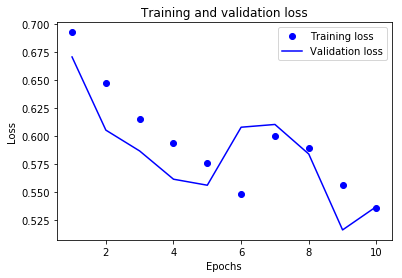

In [284]:
loss = model4_drop_recdrop.history.history['loss']
val_loss = model4_drop_recdrop.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

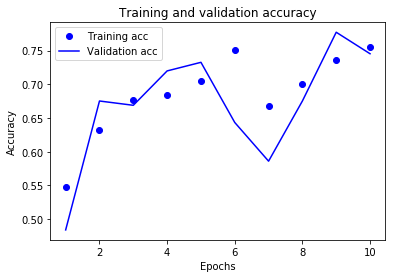

In [285]:
acc = model4_drop_recdrop.history.history['acc']
val_acc =model4_drop_recdrop.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [286]:
# evaluate the model on test set
model4_drop_recdrop.evaluate(x_test, y_test)[1]

157/157 [==============================] - 29s 186ms/step


0.7579617883749069

In [287]:
# save model and architecture to single file
model4_drop_recdrop.save("./ModelsSaved/model4_drop_recdrop.h5")
print("Saved model to disk")

Saved model to disk


In [288]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_drop_recdrop_loaded = load_model('./ModelsSaved/model4_drop_recdrop.h5')
model4_drop_recdrop_loaded.summary()

# evaluate the loaded model
score = model4_drop_recdrop_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_drop_recdrop_loaded.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 6404, 300)         6963300   
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 33        
Total params: 7,005,957
Trainable params: 42,657
Non-trainable params: 6,963,300
_________________________________________________________________
acc: 75.80%


#### Case 6: Dropout and recurrent dropout in the GRU layer with L1 regulizer in LSTM Layer

In [ ]:
# define model
model4_drop_recdrop_l1 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_drop_recdrop_l1.add(embedding_layer)
model4_drop_recdrop_l1.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l1(0.01)))
model4_drop_recdrop_l1.add(Dense(1, activation='sigmoid'))
print(model4_drop_recdrop_l1.summary())

# compile network
model4_drop_recdrop_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_drop_recdrop_l1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

In [ ]:
loss = model4_drop_recdrop_l1.history.history['loss']
val_loss = model4_drop_recdrop_l1.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
acc = model4_drop_recdrop_l1.history.history['acc']
val_acc =model4_drop_recdrop_l1.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# evaluate the model on test set
model4_drop_recdrop_l1.evaluate(x_test, y_test)[1]

In [ ]:
# save model and architecture to single file
model4_drop_recdrop_l1.save("./ModelsSaved/model4_drop_recdrop_l1.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_drop_recdrop_l1_loaded = load_model('./ModelsSaved/model4_drop_recdrop_l1.h5')
model4_drop_recdrop_l1_loaded.summary()

# evaluate the loaded model
score = model4_drop_recdrop_l1_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_drop_recdrop_l1_loaded.metrics_names[1], score[1]*100))

#### Case 7: Dropout and recurrent dropout in the GRU layer with L2 regulizer in LSTM Layer

In [ ]:
# define model
model4_drop_recdrop_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_drop_recdrop_l2.add(embedding_layer)
model4_drop_recdrop_l2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=keras.regularizers.l2(0.01)))
model4_drop_recdrop_l2.add(Dense(1, activation='sigmoid'))
print(model4_drop_recdrop_l2.summary())

# compile network
model4_drop_recdrop_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_drop_recdrop_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

In [ ]:
loss = model4_drop_recdrop_l2.history.history['loss']
val_loss = model4_drop_recdrop_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
acc = model4_drop_recdrop_l2.history.history['acc']
val_acc =model4_drop_recdrop_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# evaluate the model on test set
model4_drop_recdrop_l2.evaluate(x_test, y_test)[1]

In [ ]:
# save model and architecture to single file
model4_drop_recdrop_l2.save("./ModelsSaved/model4_drop_recdrop_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_drop_recdrop_l2_loaded = load_model('./ModelsSaved/model4_drop_recdrop_l2.h5')
model4_drop_recdrop_l2_loaded.summary()

# evaluate the loaded model
score = model4_drop_recdrop_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_drop_recdrop_l2_loaded.metrics_names[1], score[1]*100))

#### Case 8: Dropout and recurrent dropout in the GRU layer with L1 and L2 regulizer in LSTM Layer

In [ ]:
# define model
model4_drop_recdrop_l1_l2 = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model4_drop_recdrop_l1_l2.add(embedding_layer)
model4_drop_recdrop_l1_l2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2,kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model4_drop_recdrop_l1_l2.add(Dense(1, activation='sigmoid'))
print(model4_drop_recdrop_l1_l2.summary())

# compile network
model4_drop_recdrop_l1_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model4_drop_recdrop_l1_l2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

In [ ]:
loss = model4_drop_recdrop_l1_l2.history.history['loss']
val_loss = model4_drop_recdrop_l1_l2.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
acc = model4_drop_recdrop_l1_l2.history.history['acc']
val_acc =model4_drop_recdrop_l1_l2.history.history['val_acc']

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# evaluate the model on test set
model4_drop_recdrop_l1_l2.evaluate(x_test, y_test)[1]

In [ ]:
# save model and architecture to single file
model4_drop_recdrop_l1_l2.save("./ModelsSaved/model4_drop_recdrop_l1_l2.h5")
print("Saved model to disk")

In [ ]:
# Load model: The function returns the model with the same architecture and weights.
from keras.models import load_model 
model4_drop_recdrop_l1_l2_loaded = load_model('./ModelsSaved/model4_drop_recdrop_l1_l2.h5')
model4_drop_recdrop_l1_l2_loaded.summary()

# evaluate the loaded model
score = model4_drop_recdrop_l1_l2_loaded.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model4_drop_recdrop_l1_l2_loaded.metrics_names[1], score[1]*100))

### Model 5: RNN's GRU with additional hidden Layer before output layer

#### Case 1: Normal

#### Case 2: With L1 Regulizer in GRU Layer

#### Case 3: With L2 Regulizer in GRU Layer

#### Case 4: With L1 and L2 Regulizer in GRU Layer

#### Case 5:  Dropout and recurrent dropout in the GRU layer

#### Case 6: Dropout and recurrent dropout in the GRU layer with L1 regulizer in GRU Layer

#### Case 7: Dropout and recurrent dropout in the GRU layer with L2 regulizer in GRU Layer

#### Case 8: Dropout and recurrent dropout in the GRU layer with L1 and L2 regulizer in GRU Layer

#### Case 9:
1. Dropout layer added after new hidden layer
2. New added layer has no kernel regulizers
3. GRU layer still has dropout but no kernel regulizers

#### Case 10:
1. Dropout layer added after new hidden layer
2. New added layer has L1 kernel regulizer
3. GRU layer still has dropout but no kernel regulizers

#### Case 11:
1. Dropout layer added after new hidden layer
2. New added layer has L2 kernel regulizer
3. GRU layer still has dropout but no kernel regulizers

#### Case 12:
1. Dropout layer added after new hidden layer
2. New added layer has L1 and L2 kernel regulizer
3. GRU layer still has dropout but no kernel regulizers

### Model 4: RNN's LSTM with additional hidden Layer before output layer

#### Case 1: Normal

#### Case 2: With L1 Regulizer in LSTM Layer

#### Case 3: With L2 Regulizer LSTM Layer

#### Case 4: With L1 and L2 Regulizer LSTM Layer

#### Case 5:  Dropout and recurrent dropout in the LSTM layer

#### Case 6: Dropout and recurrent dropout in the LSTM layer with L1 regulizer in LSTM Layer

#### Case 7: Dropout and recurrent dropout in the GRU layer with L2 regulizer in LSTM Layer

#### Case 8: Dropout and recurrent dropout in the GRU layer with L1 and L2 regulizer in LSTM Layer

#### Case 9:
1. Dropout layer added after new hidden layer
2. New added layer has no kernel regulizers
3. LSTM layer still has dropout but no kernel regulizers

#### Case 10:
1. Dropout layer added after new hidden layer
2. New added layer has L1 kernel regulizer
3. LSTM layer still has dropout but no kernel regulizers

#### Case 11:
1. Dropout layer added after new hidden layer
2. New added layer has L2 kernel regulizer
3. GRU layer still has dropout but no kernel regulizers

#### Case 12:
1. Dropout layer added after new hidden layer
2. New added layer has L1 and L2 kernel regulizer
3. LSTM layer still has dropout but no kernel regulizers